##Deteccion de Fraudes

Este conjunto de datos ofrece una visión detallada del comportamiento transaccional y los patrones de actividad financiera, ideal para explorar la detección de fraudes y la identificación de anomalías. Contiene 2512 muestras de datos de transacciones, que abarcan diversos atributos de transacciones, datos demográficos de clientes y patrones de uso. Cada entrada ofrece información completa sobre el comportamiento de las transacciones, lo que permite el análisis para aplicaciones de seguridad financiera y detección de fraudes.

Características principales:

1. TransactionID: Identificador alfanumérico único para cada transacción.
2. AccountID: Identificador único para cada cuenta, con múltiples transacciones por cuenta.
3. TransactionAmount: valor monetario de cada transacción, desde pequeños gastos cotidianos hasta compras más grandes.
4. TransactionDate: Marca de tiempo de cada transacción, capturando fecha y hora.
5. TransactionType: Campo categórico que indica transacciones de 'Crédito' o 'Débito'.
6. Location: Ubicación geográfica de la transacción, representada por nombres de ciudades de EE. UU.
7. DeviceID: Identificador alfanumérico de los dispositivos utilizados para realizar la transacción.
8. IPAdress: Dirección IPv4 asociada a la transacción, con cambios ocasionales para algunas cuentas.
9. MerchantID: Identificador único para comerciantes, que muestra los comerciantes preferidos y atípicos para cada cuenta.
10. AccountBalance: Saldo en la cuenta post-transacción, con correlaciones lógicas basadas en el tipo de transacción y monto.
11. PreviousTransactionDate: Marca de tiempo de la última transacción de la cuenta, que ayuda a calcular la frecuencia de las transacciones.
12. Channel: Canal a través del cual se realizó la transacción (ej. Online, Cajero Automático, Sucursal).
13. CustomerAge: Edad del titular de la cuenta, con agrupaciones lógicas basadas en la ocupación.
14. CustomerOccupation: Ocupación del titular de la cuenta (por ejemplo, médico, ingeniero, estudiante, jubilado), que refleja patrones de ingresos.
15. TransactionDuration: Duración de la transacción en segundos, que varía según el tipo de transacción.
16. LoginAttempts: Número de intentos de inicio de sesión antes de la transacción, los valores más altos indican posibles anomalías.
Este conjunto de datos es ideal para científicos de datos, analistas financieros e investigadores que buscan analizar patrones transaccionales, detectar fraudes y crear modelos predictivos para aplicaciones de seguridad financiera. El conjunto de datos fue diseñado para tareas de aprendizaje automático y análisis de patrones y no está pensado como fuente de datos principal para publicaciones académicas.

https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection

OBJETIVO:
Detección de fraudes

1. Identificar transacciones fraudulentas basadas en patrones de comportamiento inusuales.
Predicción de transacciones inusuales (NO SUPERVISADO)

MOTIVACION

En un entorno financiero cada vez más complejo, la detección de fraudes es un pilar clave para garantizar la estabilidad de las instituciones bancarias. Los fraudes no solo representan pérdidas económicas, sino que también afectan la confianza de nuestros clientes y la reputación del banco.

La tecnología y el análisis de datos avanzados nos brindan las herramientas necesarias para identificar patrones sospechosos y tomar decisiones informadas. El uso de modelos predictivos y machine learning permite adelantarnos a los fraudes, bloqueándolos antes de que afecten nuestras operaciones. Esto no solo mejora la seguridad, sino que optimiza los recursos y asegura la conformidad con las regulaciones vigentes.

AUDIENCIA

Esta sesión está dirigida a:

- 🔹 Analistas de Riesgo y Fraude
- 🔹 Expertos en Ciberseguridad Financiera
- 🔹 Equipos de Auditoría Interna
- 🔹 Especialistas en Inteligencia de Datos y Machine Learning
- 🔹 Gerentes y Directivos de Gestión de Riesgos
- 🔹 Profesionales de Cumplimiento Regulatorio (Compliance)

PREGUNTAS A RESPONDER
- ¿Los canales online con montos altos y múltiples intentos fallidos de inicio de sesión presentan un mayor riesgo de fraude en comparación con otros canales?

- ¿Un alto número de intentos fallidos de inicio de sesión seguido de transacciones grandes y saldo casi vacío indica un posible acceso no autorizado?

- ¿Las transacciones de crédito/débito con montos extremadamente altos en comparación con la media pueden ser indicios de fraude?

- ¿Las transacciones de alto monto realizadas por personas muy jóvenes o ancianas presentan un mayor riesgo de fraude?

- ¿Las compras de montos muy altos realizadas por estudiantes o jubilados pueden ser consideradas sospechosas?

-  ¿Podría indicar fraude una IP con un monto total de transacciones significativamente mayor que el resto, sugiriendo múltiples compras de alto valor?

- Podria un Device que tenga montos altos de transacciones significar un fraude, si se realizan multiples compras de un mismo dispositivo?

- Podrian las transacciones de grandes montos en ubicaciones inusuales ser un indicio de fraude?

##Carga de Datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import scipy

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/gabrielagonzalezliliana/Deteccion_de_Fraudes/refs/heads/main/bank_transactions_data_2%204.csv')
df

TransactionID AccountID  TransactionAmount      TransactionDate  \
0         TX000001   AC00128              14.09  2023-04-11 16:29:14   
1         TX000002   AC00455             376.24  2023-06-27 16:44:19   
2         TX000003   AC00019             126.29  2023-07-10 18:16:08   
3         TX000004   AC00070             184.50  2023-05-05 16:32:11   
4         TX000005   AC00411              13.45  2023-10-16 17:51:24   
...            ...       ...                ...                  ...   
2507      TX002508   AC00297             856.21  2023-04-26 17:09:36   
2508      TX002509   AC00322             251.54  2023-03-22 17:36:48   
2509      TX002510   AC00095              28.63  2023-08-21 17:08:50   
2510      TX002511   AC00118             185.97  2023-02-24 16:24:46   
2511      TX002512   AC00009             243.08  2023-02-14 16:21:23   

     TransactionType          Location DeviceID      IP Address MerchantID  \
0              Debit         San Diego  D000380  162.198.218.92       M015   
1              Debit           Houston  D000051     13.149.61.4       M052   
2              Debit              Mesa  D000235  215.97.143.157       M009   
3              Debit           Raleigh  D000187  200.13.225.150       M002   
4             Credit           Atlanta  D000308    65.164.3.100       M091   
...              ...               ...      ...             ...        ...   
2507          Credit  Colorado Springs  D000625    21.157.41.17       M072   
2508           Debit            Tucson  D000410  49.174.157.140       M029   
2509           Debit         San Diego  D000095     58.1.27.124       M087   
2510           Debit            Denver  D000634   21.190.11.223       M041   
2511          Credit      Jacksonville  D000215   59.127.135.25       M041   

     Channel  CustomerAge CustomerOccupation  TransactionDuration  \
0        ATM           70             Doctor                   81   
1        ATM           68             Doctor                  141   
2     Online           19            Student                   56   
3     Online           26            Student                   25   
4     Online           26            Student                  198   
...      ...          ...                ...                  ...   
2507  Branch           33             Doctor                  109   
2508  Branch           48             Doctor                  177   
2509  Branch           56            Retired                  146   
2510  Online           23            Student                   19   
2511  Online           24            Student                   93   

      LoginAttempts  AccountBalance PreviousTransactionDate  
0                 1         5112.21     2024-11-04 08:08:08  
1                 1        13758.91     2024-11-04 08:09:35  
2                 1         1122.35     2024-11-04 08:07:04  
3                 1         8569.06     2024-11-04 08:09:06  
4                 1         7429.40     2024-11-04 08:06:39  
...             ...             ...                     ...  
2507              1        12690.79     2024-11-04 08:11:29  
2508              1          254.75     2024-11-04 08:11:42  
2509              1         3382.91     2024-11-04 08:08:39  
2510              1         1776.91     2024-11-04 08:12:22  
2511              1          131.25     2024-11-04 08:07:49  

[2512 rows x 16 columns]

In [ ]:
df1 = df.copy()
df1

TransactionID AccountID  TransactionAmount      TransactionDate  \
0         TX000001   AC00128              14.09  2023-04-11 16:29:14   
1         TX000002   AC00455             376.24  2023-06-27 16:44:19   
2         TX000003   AC00019             126.29  2023-07-10 18:16:08   
3         TX000004   AC00070             184.50  2023-05-05 16:32:11   
4         TX000005   AC00411              13.45  2023-10-16 17:51:24   
...            ...       ...                ...                  ...   
2507      TX002508   AC00297             856.21  2023-04-26 17:09:36   
2508      TX002509   AC00322             251.54  2023-03-22 17:36:48   
2509      TX002510   AC00095              28.63  2023-08-21 17:08:50   
2510      TX002511   AC00118             185.97  2023-02-24 16:24:46   
2511      TX002512   AC00009             243.08  2023-02-14 16:21:23   

     TransactionType          Location DeviceID      IP Address MerchantID  \
0              Debit         San Diego  D000380  162.198.218.92       M015   
1              Debit           Houston  D000051     13.149.61.4       M052   
2              Debit              Mesa  D000235  215.97.143.157       M009   
3              Debit           Raleigh  D000187  200.13.225.150       M002   
4             Credit           Atlanta  D000308    65.164.3.100       M091   
...              ...               ...      ...             ...        ...   
2507          Credit  Colorado Springs  D000625    21.157.41.17       M072   
2508           Debit            Tucson  D000410  49.174.157.140       M029   
2509           Debit         San Diego  D000095     58.1.27.124       M087   
2510           Debit            Denver  D000634   21.190.11.223       M041   
2511          Credit      Jacksonville  D000215   59.127.135.25       M041   

     Channel  CustomerAge CustomerOccupation  TransactionDuration  \
0        ATM           70             Doctor                   81   
1        ATM           68             Doctor                  141   
2     Online           19            Student                   56   
3     Online           26            Student                   25   
4     Online           26            Student                  198   
...      ...          ...                ...                  ...   
2507  Branch           33             Doctor                  109   
2508  Branch           48             Doctor                  177   
2509  Branch           56            Retired                  146   
2510  Online           23            Student                   19   
2511  Online           24            Student                   93   

      LoginAttempts  AccountBalance PreviousTransactionDate  
0                 1         5112.21     2024-11-04 08:08:08  
1                 1        13758.91     2024-11-04 08:09:35  
2                 1         1122.35     2024-11-04 08:07:04  
3                 1         8569.06     2024-11-04 08:09:06  
4                 1         7429.40     2024-11-04 08:06:39  
...             ...             ...                     ...  
2507              1        12690.79     2024-11-04 08:11:29  
2508              1          254.75     2024-11-04 08:11:42  
2509              1         3382.91     2024-11-04 08:08:39  
2510              1         1776.91     2024-11-04 08:12:22  
2511              1          131.25     2024-11-04 08:07:49  

[2512 rows x 16 columns]

##Exploracion de Datos

In [ ]:
df1.shape

(2512, 16)

In [ ]:
estadisticas_numericas = df1.describe().round(2)

estilo = estadisticas_numericas.style.background_gradient(cmap='Blues')
display(estilo)

In [ ]:
estadisticas_categoricas = df.describe(include='object').T
cmap = plt.get_cmap('Blues')
background_color = mcolors.rgb2hex(cmap(0.95))

estilo = estadisticas_categoricas.style.set_properties(**{'background-color': background_color})
display(estilo)

In [ ]:
df1.columns

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [ ]:
df1.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [ ]:
df1.duplicated().sum()

np.int64(0)

In [ ]:
df1.nunique()

TransactionID              2512
AccountID                   495
TransactionAmount          2455
TransactionDate            2512
TransactionType               2
Location                     43
DeviceID                    681
IP Address                  592
MerchantID                  100
Channel                       3
CustomerAge                  63
CustomerOccupation            4
TransactionDuration         288
LoginAttempts                 5
AccountBalance             2510
PreviousTransactionDate     360
dtype: int64

In [ ]:
df1.dtypes

TransactionID               object
AccountID                   object
TransactionAmount          float64
TransactionDate             object
TransactionType             object
Location                    object
DeviceID                    object
IP Address                  object
MerchantID                  object
Channel                     object
CustomerAge                  int64
CustomerOccupation          object
TransactionDuration          int64
LoginAttempts                int64
AccountBalance             float64
PreviousTransactionDate     object
dtype: object

#Limpieza de datos

In [ ]:
#convierto fechas a time
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='%Y-%m-%d %H:%M:%S')
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
print(df['TransactionDate'].dtype)
print(df['PreviousTransactionDate'].dtype)

datetime64[ns]
datetime64[ns]


#EDA

In [ ]:
!pip install summarytools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.3 MB/s eta 0:00:00


In [ ]:
from summarytools import dfSummary

In [ ]:
dfSummary(df1)

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     \ 17.9 MB 34.8 MB/s 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 78.5 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=400138 sha256=6060c2bd0827bd5a80ec4b2ef591640cf176448b314883e661b92962dfb8ca86
  Stored in directory: /tmp/pip-ephem-wheel-cache-2gfyz1i0/wheels/85/5d/45/8a23c7b77d2023fbc37490b8902f7fdeff5614f65d6e08b6c4
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=7af2b

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
#Install ydata-profiling
!pip install ydata-profiling
#Import ProfileReport
from ydata_profiling import ProfileReport

#Lectura del dataframe
url = 'https://raw.githubusercontent.com/gabrielagonzalezliliana/Deteccion_de_Fraudes/refs/heads/main/bank_transactions_data_2%204.csv'
data = pd.read_csv(url, sep = ",")
data.head()

# ... (rest of your code) ...

#Data Profiling
profile = ProfileReport(data,correlations={
            "auto": {"calculate": True},
            "pearson": {"calculate": True},
            "spearman": {"calculate": True},
            "kendall": {"calculate": True},
            "phi_k": {"calculate": True},
            "cramers": {"calculate": True},
        })
profile

Output hidden; open in https://colab.research.google.com to view.

#Analisis Univariado

##Distribucion de las Variables Cualitativas

###Tipo de Transacciones

In [ ]:
df1['TransactionType'].value_counts()

TransactionType
Debit     1944
Credit     568
Name: count, dtype: int64

In [ ]:
tipo_transaccion_cantidades = df1['TransactionType'].value_counts()

# Lista de colores personalizados que combinan bien entre sí
colores_combinados = ["#1976D2", "#26C6DA", "#7E57C2", "#FFA726", "#66BB6A", "#D81B60", "#8D6E63"]

fig = px.pie(values=tipo_transaccion_cantidades.values,
             names=tipo_transaccion_cantidades.index,
             title="Tipo de Transacciones",
             hole=0.3,
             color_discrete_sequence=colores_combinados)  # Colores combinados

# Configurar fondo negro
fig.update_layout(
    paper_bgcolor="black",   # Fondo de toda la figura
    plot_bgcolor="black",    # Fondo del área del gráfico
    font=dict(color="white") # Color del texto en blanco para mejor visibilidad
)

fig.show()

El gráfico muestra que las transacciones de débito son significativamente más frecuentes que las de crédito. El recuento de transacciones de débito es de aproximadamente 1944,(77.4%) mientras que las de crédito son aproximadamente 568(22.6%)

###Ocupacion de los clientes

In [ ]:
ocupacion_clientes = df1['CustomerOccupation'].value_counts()
ocupacion_clientes

CustomerOccupation
Student     657
Doctor      631
Engineer    625
Retired     599
Name: count, dtype: int64

In [ ]:
fig = px.pie(values=ocupacion_clientes.values,
             names=ocupacion_clientes.index,
             title="Ocupacion de los Clientes",
             hole= 0.3,
             color_discrete_sequence=colores_combinados)
# Configurar fondo negro
fig.update_layout(
    paper_bgcolor="black",   # Fondo de toda la figura
    plot_bgcolor="black",    # Fondo del área del gráfico
    font=dict(color="white") # Color del texto en blanco para mejor visibilidad
)
fig.show()


El grafico muestra una distribución  uniforme entre las cuatro ocupaciones de los clientes: médico, estudiante, jubilado e ingeniero. "Estudiante" y "Médico" parecen tener el mayor número de transacciones, con "Estudiante" ligeramente por delante.

###Canal de Transaccion

In [ ]:
df1['Channel'].value_counts()

Channel
Branch    868
ATM       833
Online    811
Name: count, dtype: int64

In [ ]:
canal_transacciones = df1['Channel'].value_counts()
fig = px.pie(values=canal_transacciones.values,
             names=canal_transacciones.index,
             title="Canal de Transacciones",
             hole=0.3,
             color_discrete_sequence=colores_combinados)
# Configurar fondo negro
fig.update_layout(
    paper_bgcolor="black",   # Fondo de toda la figura
    plot_bgcolor="black",    # Fondo del área del gráfico
    font=dict(color="white") # Color del texto en blanco para mejor visibilidad
)
fig.show()

El grafico muestran una distribución uniforme de las transacciones en los tres canales: cajero automático, en línea y sucursal.
Las transacciones en sucursal(Branch) parecen ser las más frecuentes, seguidas de las transacciones en cajero automático (ATM) y en línea(online). Sin embargo, la diferencia en el número de transacciones entre los canales no es muy significativa.

###Locacion de las transacciones

In [ ]:
df1['Location'].value_counts()

Location
Fort Worth          70
Los Angeles         69
Oklahoma City       68
Charlotte           68
Philadelphia        67
Tucson              67
Omaha               65
Miami               64
Memphis             63
Detroit             63
Houston             63
Denver              62
Kansas City         61
Boston              61
Seattle             61
Mesa                61
Atlanta             61
Fresno              60
Chicago             60
Colorado Springs    60
Jacksonville        60
San Jose            59
Raleigh             59
San Diego           59
San Antonio         59
Austin              59
Indianapolis        58
New York            58
San Francisco       57
Las Vegas           55
Nashville           55
Virginia Beach      55
Phoenix             55
Milwaukee           55
Columbus            54
Sacramento          53
Baltimore           51
Louisville          51
Dallas              49
Washington          48
El Paso             46
Portland            42
Albuquerque         41
Name: count, dtype: int64

In [ ]:
localidades_transacciones = df1['Location'].value_counts().head(10)
fig = px.bar(x=localidades_transacciones.index,
             y=localidades_transacciones.values,
             title="Cantidad de Transacciones por Top 10 Localidad",
             labels={'x': 'Localidad', 'y': 'Número de Transacciones'},
             text=localidades_transacciones.values,
             height=600,
             color_discrete_sequence=colores_combinados)  # Colores combinados

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_tickangle=-45,
    paper_bgcolor="black",   # Fondo de toda la figura
    plot_bgcolor="black",    # Fondo del área del gráfico
    font=dict(color="white") # Color del texto en blanco para mejor visibilidad
)
fig.update_traces(textposition='outside')
fig.update_layout(xaxis_tickangle=-45)
fig.show()


In [ ]:
localidades_monto_transaccion = df.groupby('Location')['TransactionAmount'].agg(['count', 'mean', 'median'])
print(localidades_monto_transaccion.nlargest(10, 'count'))

               count        mean  median
Location                                
Fort Worth        70  296.810571  240.41
Los Angeles       69  285.155797  170.19
Charlotte         68  260.039118  185.15
Oklahoma City     68  319.353529  226.50
Philadelphia      67  290.586866  177.05
Tucson            67  305.369552  214.83
Omaha             65  283.143846  178.91
Miami             64  265.144219  168.07
Detroit           63  327.139048  235.40
Houston           63  308.200794  224.19


La distribución de las transacciones entre las 10 principales localidades es uniforme. Fort Worth registra el mayor número de transacciones entre las 10 ubicaciones principales, con 70 transacciones.

###Transacciones por id de comerciante

In [ ]:
df1['MerchantID'].value_counts().head(10)

MerchantID
M026    45
M066    34
M028    33
M014    33
M065    33
M013    33
M070    32
M068    32
M001    32
M005    32
Name: count, dtype: int64

In [ ]:
top_comerciantes = df1['MerchantID'].value_counts().head(10)
fig = px.bar(x=top_comerciantes.index,
             y=top_comerciantes.values,
             title="Cantidad de Transacciones por Top 10 Comerciantes",
             labels={'x': 'Comerciante ID', 'y': 'Número de Transacciones'},
             text=top_comerciantes.values,
             height=600,
             color_discrete_sequence=colores_combinados)  # Colores combinados

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_tickangle=-45,
    paper_bgcolor="black",   # Fondo de toda la figura
    plot_bgcolor="black",    # Fondo del área del gráfico
    font=dict(color="white") # Color del texto en blanco para mejor visibilidad
)
fig.update_traces(textposition='outside')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [ ]:
comerciante_monto_transaccion = df.groupby('MerchantID')['TransactionAmount'].agg(['count', 'mean', 'median'])
print(comerciante_monto_transaccion.nlargest(10, 'count'))

            count        mean   median
MerchantID                            
M026           45  308.114444  185.990
M066           34  351.433824  244.210
M013           33  315.646970  236.810
M014           33  286.909091  256.800
M028           33  312.615758  180.940
M065           33  240.501818  166.550
M001           32  260.002500  145.850
M005           32  346.872813  275.325
M015           32  298.023438  171.250
M068           32  302.502187  269.905


El comercio con id M026, representa alrededor del 13,3 % de las transacciones,  registrando el mayor número de transacciones entre los 10 principales, con 45 transacciones.

##Distribucion de las Variables Cuantitativas

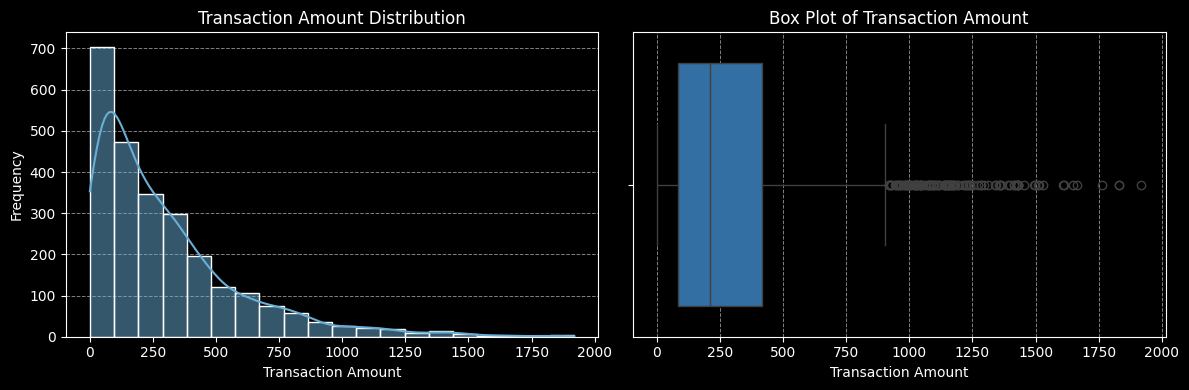


Resumen estadístico de Transaction Amount:
 count    2512.000000
mean      297.593778
std       291.946243
min         0.260000
25%        81.885000
50%       211.140000
75%       414.527500
max      1919.110000
Name: TransactionAmount, dtype: float64


In [ ]:
colores = sns.color_palette("Blues", 3)

# Configuración del fondo negro
plt.style.use('dark_background')

# Crear los subgráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Histograma con KDE
sns.histplot(df1['TransactionAmount'], bins=20, kde=True, color=colores[1], ax=axes[0])
axes[0].set_title('Transaction Amount Distribution', color='white')
axes[0].set_xlabel('Transaction Amount', color='white')
axes[0].set_ylabel('Frequency', color='white')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

# Boxplot
sns.boxplot(x=df1['TransactionAmount'], color=colores[2], ax=axes[1])
axes[1].set_title('Box Plot of Transaction Amount', color='white')
axes[1].set_xlabel('Transaction Amount', color='white')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

# Asegurar que el texto y los gráficos tengan colores apropiados
for ax in axes:
    ax.tick_params(axis='both', colors='white')  # Colorear las etiquetas de los ejes
    ax.set_facecolor('black')  # Fondo negro para los ejes

# Ajustar el diseño y mostrar
plt.tight_layout()
plt.show()

# Resumen estadístico de 'TransactionAmount'
print(f'\nResumen estadístico de Transaction Amount:\n', df1['TransactionAmount'].describe())

In [ ]:
scipy.stats.describe(df1['TransactionAmount'])

DescribeResult(nobs=2512, minmax=(np.float64(0.26), np.float64(1919.11)), mean=np.float64(297.5937778662421), variance=np.float64(85232.60902510876), skewness=np.float64(1.7390674727944568), kurtosis=np.float64(3.6333862764401044))

El histograma muestra claramente una distribución sesgada a la derecha. Esto significa que hay muchas transacciones pequeñas y algunas muy grandes. Este patrón es común en datos financieros, donde la mayoría de las transacciones son relativamente pequeñas, mientras que una minoría involucra montos significativamente mayores.

El boxplot confirma la presencia de valores atípicos. Los valores del lado derecho indican valores significativamente más altos que la mayoría de los datos. Estos valores atípicos podrían representar transacciones inusuales o potencialmente fraudulentas

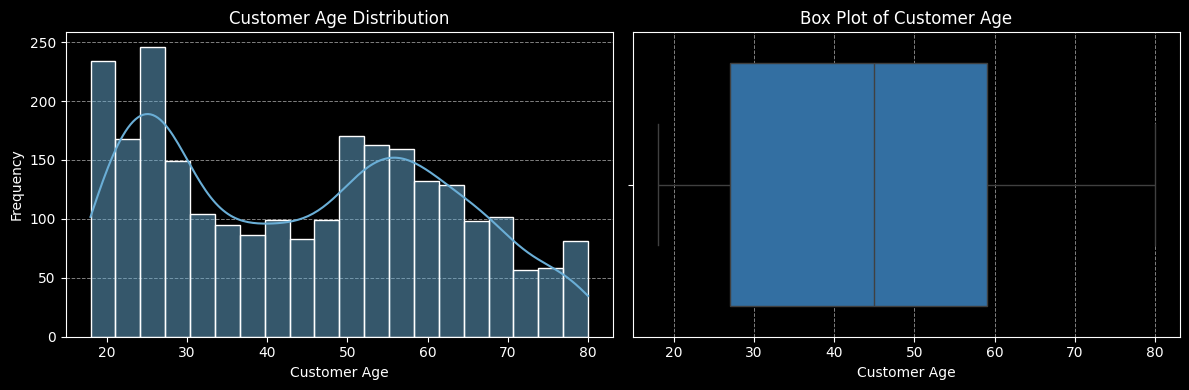


Resumen estadistico de Customer Age:
 count    2512.000000
mean       44.673965
std        17.792198
min        18.000000
25%        27.000000
50%        45.000000
75%        59.000000
max        80.000000
Name: CustomerAge, dtype: float64


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['CustomerAge'], bins=20, kde=True, color=colores[1], ax=axes[0])
axes[0].set_title('Customer Age Distribution')
axes[0].set_xlabel('Customer Age')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

sns.boxplot(x=df['CustomerAge'], color=colores[2], ax=axes[1])
axes[1].set_title('Box Plot of Customer Age')
axes[1].set_xlabel('Customer Age')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f'\nResumen estadistico de Customer Age:\n', df['CustomerAge'].describe())

In [ ]:
scipy.stats.describe(df1['CustomerAge'])

DescribeResult(nobs=2512, minmax=(np.int64(18), np.int64(80)), mean=np.float64(44.673964968152866), variance=np.float64(316.56231672995506), skewness=np.float64(0.1477760713709111), kurtosis=np.float64(-1.2241467771251038))

El histograma sugiere una distribución aproximadamente simétrica de las edades de los clientes, con un ligero pico alrededor de la mediana edad. Esto indica que la base de clientes está distribuida de forma relativamente uniforme entre los diferentes grupos de edad. El diagrama de caja no muestra valores atípicos extremos. Los bigotes se extienden hasta los valores mínimo y máximo dentro de un rango razonable, lo que sugiere que la distribución por edades está relativamente equilibrada.

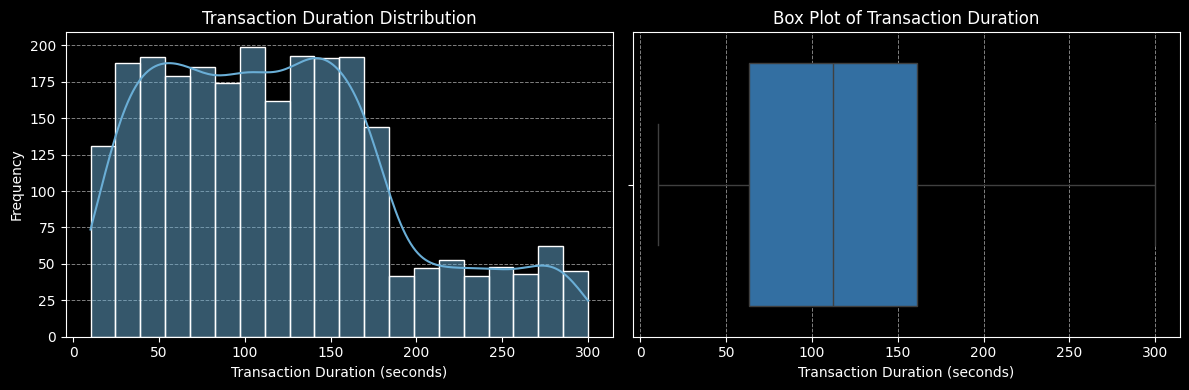


Resumen Estadistico de Transaction Duration:
 count    2512.000000
mean      119.643312
std        69.963757
min        10.000000
25%        63.000000
50%       112.500000
75%       161.000000
max       300.000000
Name: TransactionDuration, dtype: float64


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['TransactionDuration'], bins=20, kde=True, color=colores[1], ax=axes[0])
axes[0].set_title('Transaction Duration Distribution')
axes[0].set_xlabel('Transaction Duration (seconds)')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

sns.boxplot(x=df['TransactionDuration'], color=colores[2], ax=axes[1])
axes[1].set_title('Box Plot of Transaction Duration')
axes[1].set_xlabel('Transaction Duration (seconds)')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f'\nResumen Estadistico de Transaction Duration:\n', df['TransactionDuration'].describe())


In [ ]:
scipy.stats.describe(df1['TransactionDuration'])

DescribeResult(nobs=2512, minmax=(np.int64(10), np.int64(300)), mean=np.float64(119.64331210191082), variance=np.float64(4894.927283012073), skewness=np.float64(0.5990738033681696), kurtosis=np.float64(-0.2605526495023578))

El histograma sugiere una distribución aproximadamente simétrica de la duración de las transacciones, con un ligero pico en el rango medio. Esto indica que la mayoría de las transacciones tienen una duración moderada. El diagrama de caja no muestra valores atípicos extremos. Los bigotes se extienden hasta los valores mínimo y máximo dentro de un rango razonable, lo que sugiere que la distribución está relativamente equilibrada.

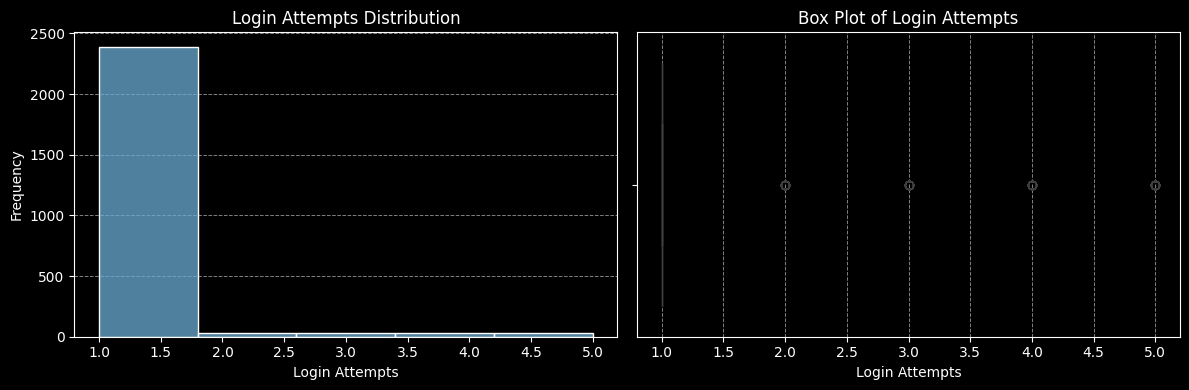


Resumen Estadistico de Login Attempts:
 count    2512.000000
mean        1.124602
std         0.602662
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: LoginAttempts, dtype: float64


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['LoginAttempts'], bins=5, kde=False, color=colores[1], ax=axes[0]) # bins adjusted to 5
axes[0].set_title('Login Attempts Distribution')
axes[0].set_xlabel('Login Attempts')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

sns.boxplot(x=df['LoginAttempts'], color=colores[2], ax=axes[1])
axes[1].set_title('Box Plot of Login Attempts')
axes[1].set_xlabel('Login Attempts')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f'\nResumen Estadistico de Login Attempts:\n', df['LoginAttempts'].describe())

In [ ]:
scipy.stats.describe(df1['LoginAttempts'])

DescribeResult(nobs=2512, minmax=(np.int64(1), np.int64(5)), mean=np.float64(1.1246019108280254), variance=np.float64(0.36320175305090713), skewness=np.float64(5.170400738779344), kurtosis=np.float64(26.613744951947748))

El histograma y el diagrama de cajas muestran claramente que la distribución de intentos de inicio de sesión está fuertemente sesgada hacia 1. Esto significa que la gran mayoría de las transacciones son precedidas por un solo intento de inicio de sesión. El diagrama de cajas indica la presencia de algunos valores atípicos con un mayor número de intentos de inicio de sesión. Estos valores atípicos podrían representar casos de múltiples intentos de inicio de sesión fallidos antes de una transacción exitosa, lo que podría justificar una investigación más profunda.

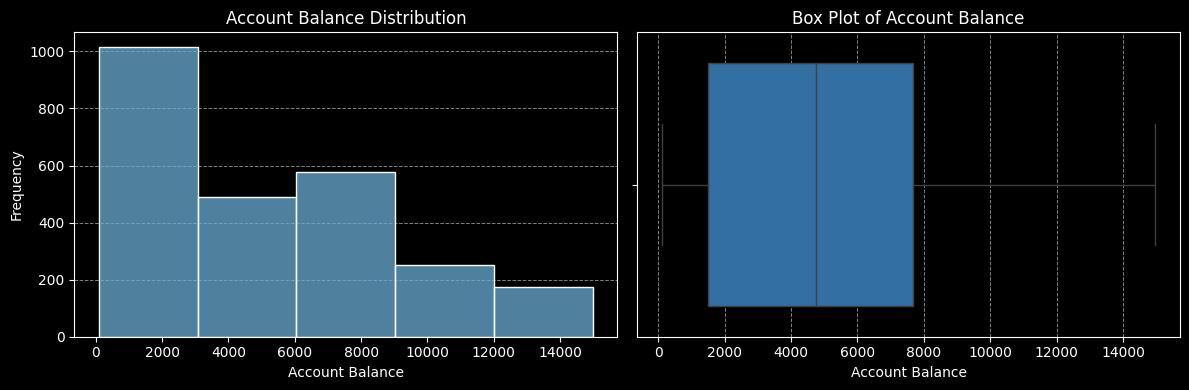


Summary Statistics for Account Balance:
 count     2512.000000
mean      5114.302966
std       3900.942499
min        101.250000
25%       1504.370000
50%       4735.510000
75%       7678.820000
max      14977.990000
Name: AccountBalance, dtype: float64


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['AccountBalance'], bins=5, kde=False, color=colores[1], ax=axes[0]) # bins adjusted to 5
axes[0].set_title('Account Balance Distribution')
axes[0].set_xlabel('Account Balance')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

sns.boxplot(x=df['AccountBalance'], color=colores[2], ax=axes[1])
axes[1].set_title('Box Plot of Account Balance')
axes[1].set_xlabel('Account Balance')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f'\nSummary Statistics for Account Balance:\n', df['AccountBalance'].describe())

In [ ]:
scipy.stats.describe(df1['AccountBalance'])

DescribeResult(nobs=2512, minmax=(np.float64(101.25), np.float64(14977.99)), mean=np.float64(5114.302965764331), variance=np.float64(15217352.378406454), skewness=np.float64(0.6008421741892332), kurtosis=np.float64(-0.5660303626567988))

El histograma muestra una distribución sesgada a la derecha, lo que indica que la mayoría de las cuentas tienen saldos bajos, mientras que una proporción menor tiene saldos significativamente altos. El diagrama de caja confirma la presencia de valores atípicos. La cola larga a la derecha del diagrama de caja indica la presencia de valores significativamente superiores a la mayoría de los puntos de datos. Estos valores atípicos podrían representar cuentas con saldos inusualmente altos.

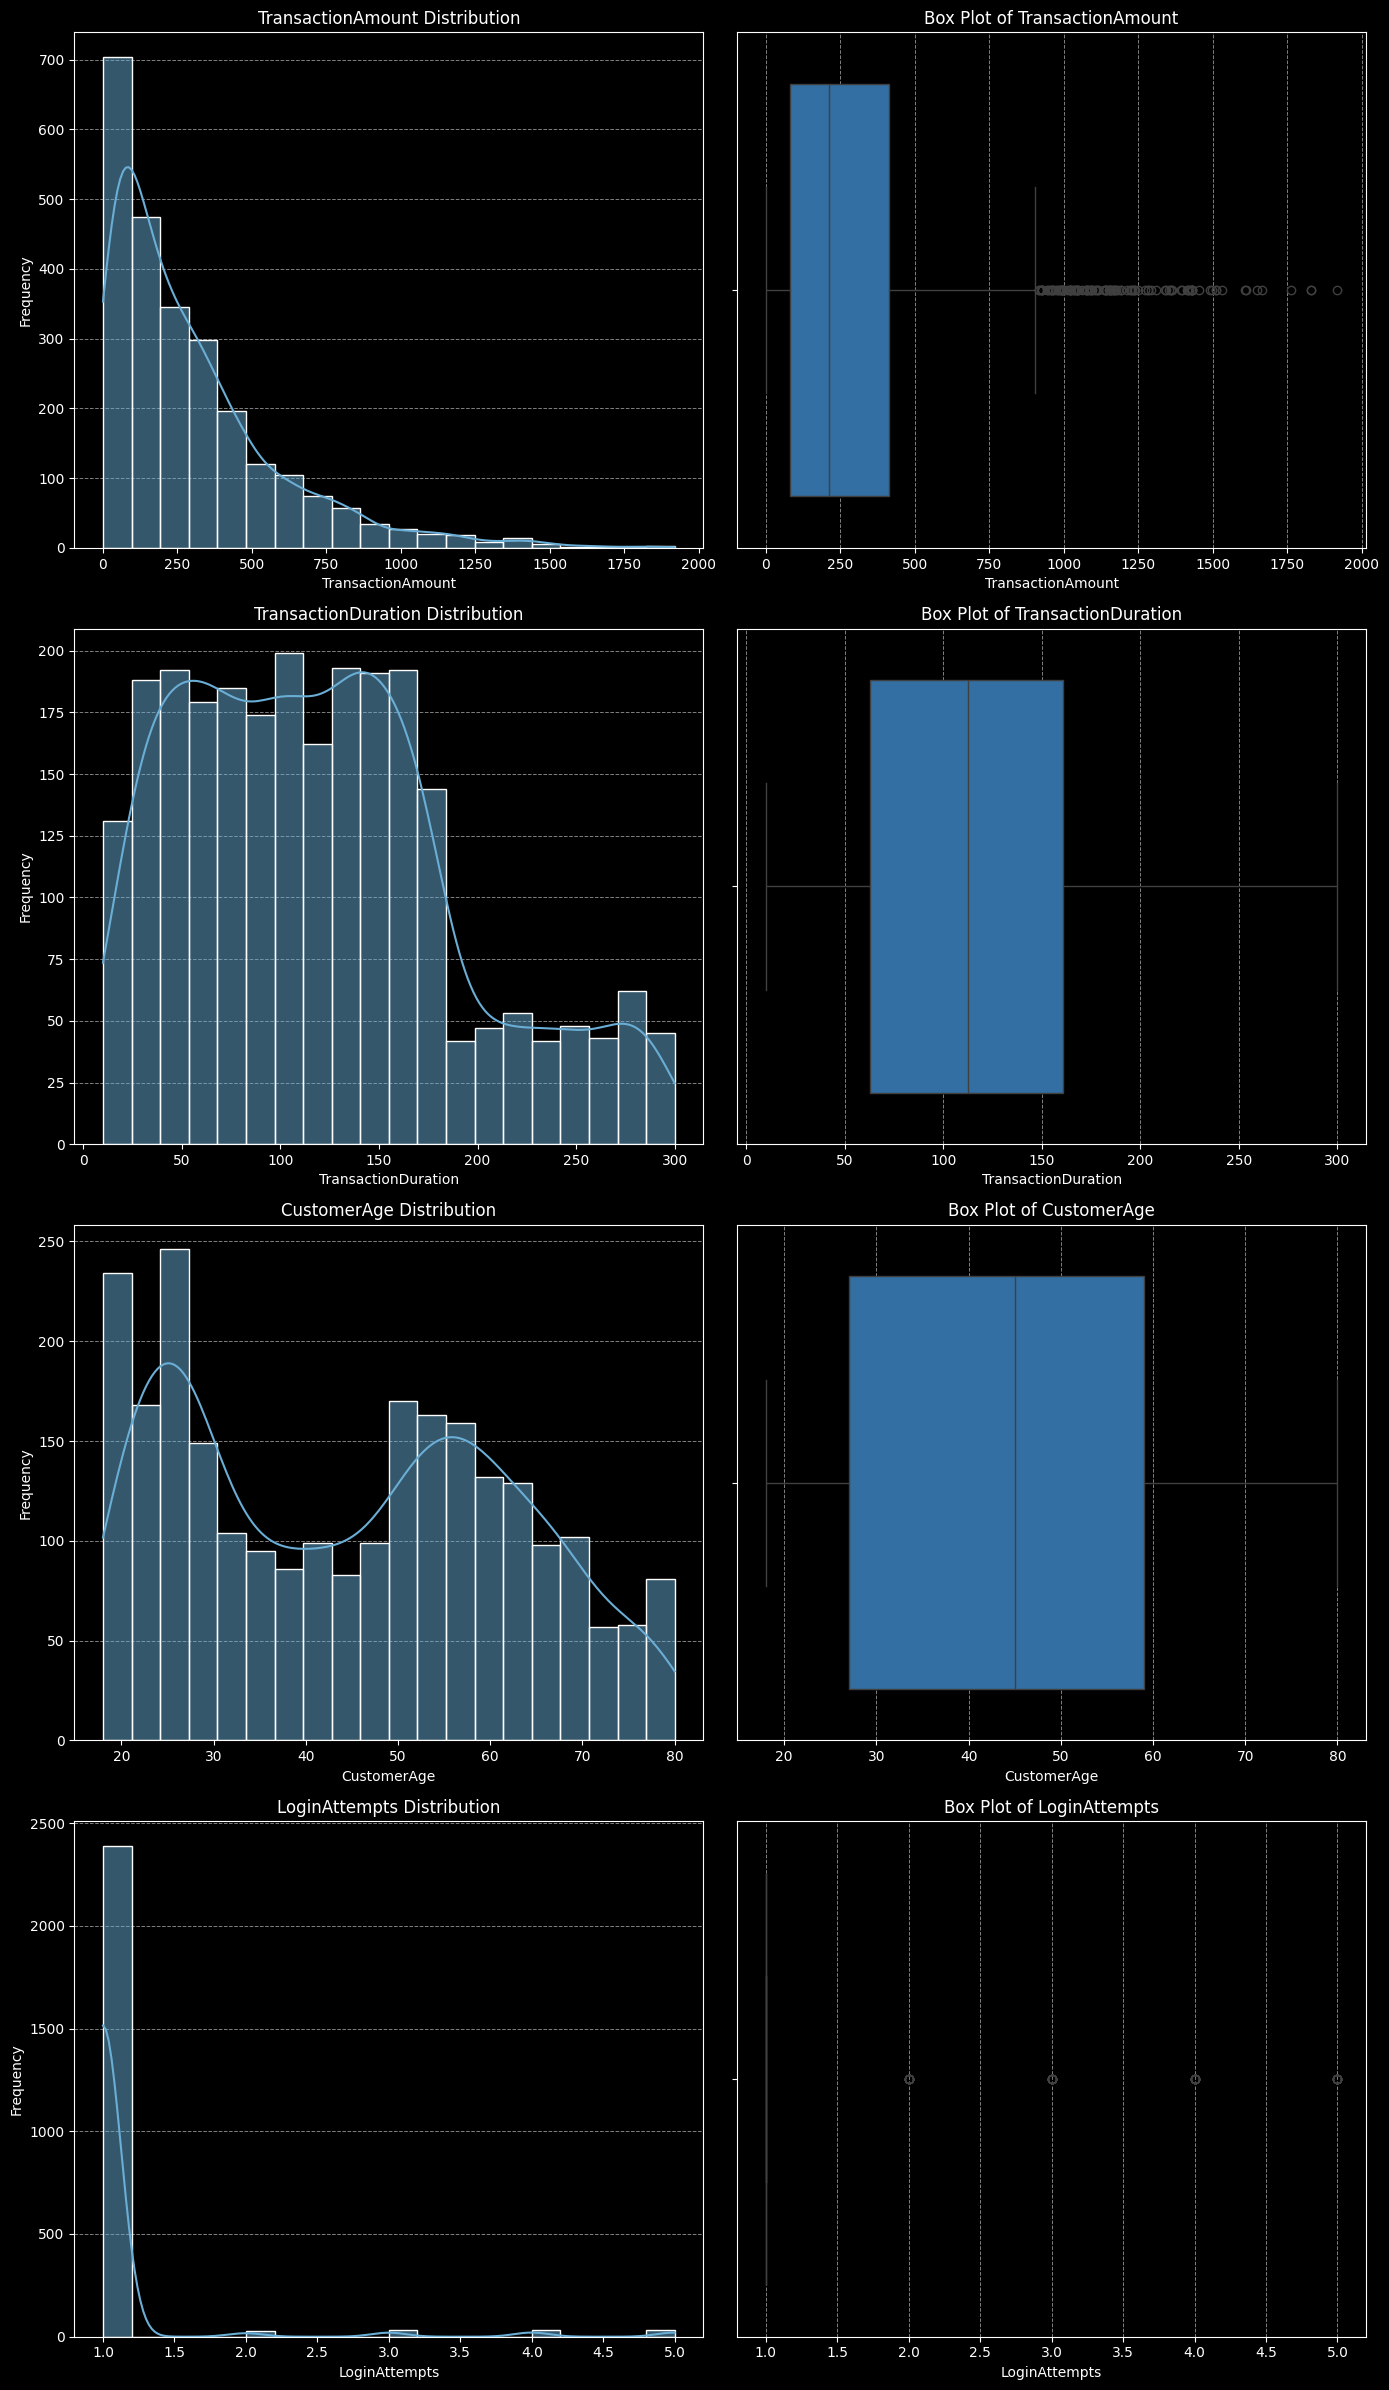


Resumen estadístico de TransactionAmount:
 count    2512.000000
mean      297.593778
std       291.946243
min         0.260000
25%        81.885000
50%       211.140000
75%       414.527500
max      1919.110000
Name: TransactionAmount, dtype: float64

Resumen estadístico de TransactionDuration:
 count    2512.000000
mean      119.643312
std        69.963757
min        10.000000
25%        63.000000
50%       112.500000
75%       161.000000
max       300.000000
Name: TransactionDuration, dtype: float64

Resumen estadístico de CustomerAge:
 count    2512.000000
mean       44.673965
std        17.792198
min        18.000000
25%        27.000000
50%        45.000000
75%        59.000000
max        80.000000
Name: CustomerAge, dtype: float64

Resumen estadístico de LoginAttempts:
 count    2512.000000
mean        1.124602
std         0.602662
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: LoginAttempts, dtype: float64


In [ ]:
numerical_columns = ['TransactionAmount', 'TransactionDuration', 'CustomerAge', 'LoginAttempts']

# Colores de la paleta de seaborn "Blues"
colores = sns.color_palette("Blues", 3)

# Crear una figura con subgráficos
fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(14, 6 * len(numerical_columns)))

# Iterar sobre las columnas numéricas y crear el histograma y el boxplot
for i, col in enumerate(numerical_columns):
    # Histograma con KDE
    sns.histplot(df1[col], bins=20, kde=True, color=colores[1], ax=axes[i][0])
    axes[i][0].set_title(f'{col} Distribution')
    axes[i][0].set_xlabel(col)
    axes[i][0].set_ylabel('Frequency')
    axes[i][0].set_axisbelow(True)
    axes[i][0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

    # Boxplot
    sns.boxplot(x=df1[col], color=colores[2], ax=axes[i][1])
    axes[i][1].set_title(f'Box Plot of {col}')
    axes[i][1].set_xlabel(col)
    axes[i][1].set_axisbelow(True)
    axes[i][1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

# Ajustar el diseño para que no se solapen los gráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

# Mostrar resumen estadístico para cada columna numérica
for col in numerical_columns:
    print(f'\nResumen estadístico de {col}:\n', df1[col].describe())

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Crear histogramas y boxplots con Plotly en subgráficos
for col in numerical_columns:
    # Crear un subplot con dos columnas (1 fila, 2 columnas)
    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=[f'{col} Distribution', f'Box Plot of {col}'],
        shared_yaxes=True
    )

    # Histograma
    fig_hist = px.histogram(df1, x=col, nbins=20, marginal="box")
    fig.add_trace(fig_hist.data[0], row=1, col=1)  # Histograma en la primera columna
    fig.add_trace(fig_hist.data[1], row=1, col=1)  # Box plot marginal en la primera columna

    # Boxplot
    fig_box = px.box(df1, y=col)
    fig.add_trace(fig_box.data[0], row=1, col=2)  # Boxplot en la segunda columna

    # Actualizar diseño
    fig.update_layout(
        title=f'{col} - Distribution and Box Plot',
        showlegend=False,
        width=1200,  # Ajusta el ancho del gráfico
        height=400,  # Ajusta la altura del gráfico
        xaxis_title=col,
        yaxis_title='Frequency',
        xaxis2_title=col,
        yaxis2_title=col
    )

    # Mostrar el gráfico
    fig.show()

    # Resumen estadístico
    print(f'\nResumen estadístico de {col}:\n', df1[col].describe())



Resumen estadístico de TransactionAmount:
 count    2512.000000
mean      297.593778
std       291.946243
min         0.260000
25%        81.885000
50%       211.140000
75%       414.527500
max      1919.110000
Name: TransactionAmount, dtype: float64



Resumen estadístico de TransactionDuration:
 count    2512.000000
mean      119.643312
std        69.963757
min        10.000000
25%        63.000000
50%       112.500000
75%       161.000000
max       300.000000
Name: TransactionDuration, dtype: float64



Resumen estadístico de CustomerAge:
 count    2512.000000
mean       44.673965
std        17.792198
min        18.000000
25%        27.000000
50%        45.000000
75%        59.000000
max        80.000000
Name: CustomerAge, dtype: float64



Resumen estadístico de LoginAttempts:
 count    2512.000000
mean        1.124602
std         0.602662
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: LoginAttempts, dtype: float64


#Mapa

In [ ]:
import time
import folium
from geopy.geocoders import Nominatim

# Obtener ubicaciones únicas
unique_locations = df['Location'].unique()
location_coords = {}

# Crear un geolocalizador
geolocator = Nominatim(user_agent="location_mapper")

# Obtener coordenadas
for location in unique_locations:
    try:
        loc = geolocator.geocode(location)
        if loc:
            location_coords[location] = (loc.latitude, loc.longitude)
        else:
            print(f"Coordinates not found for {location}")

        # Agregar un retraso para evitar el bloqueo de la API por solicitudes excesivas
        time.sleep(1)  # Ajusta el tiempo de espera si es necesario

    except Exception as e:
        print(f"Error fetching coordinates for {location}: {e}")


In [ ]:
# Crear un mapa base centrado en el primer lugar o en una ubicación general
map_center = list(location_coords.values())[0] if location_coords else [0, 0]  # Por defecto, el mapa estará centrado en [0, 0]
mymap = folium.Map(location=map_center, zoom_start=10)

# Agregar marcadores para cada ubicación
for location, coords in location_coords.items():
    folium.Marker(location=coords, popup=location).add_to(mymap)
mymap.save("mapa_ubicaciones.html")
mymap


#Analisis Bivariado

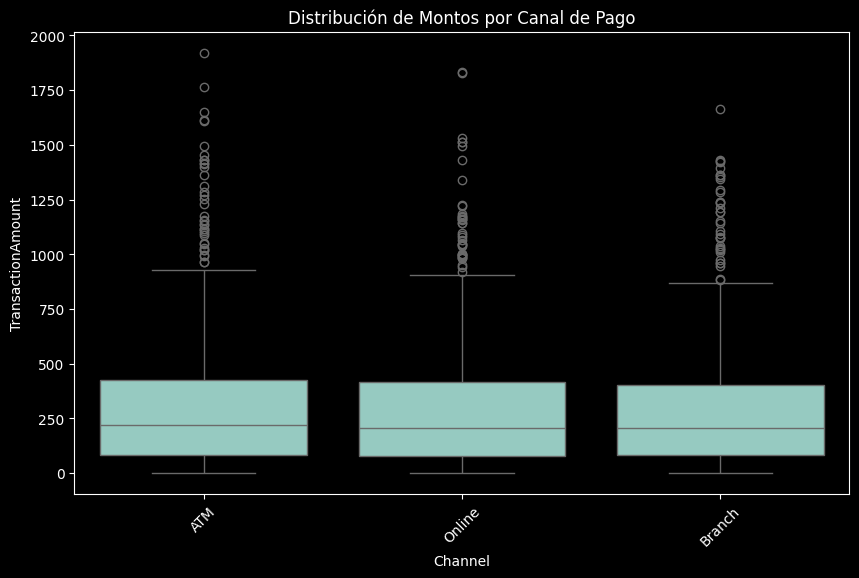

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df1, x="Channel", y="TransactionAmount")
plt.xticks(rotation=45)
plt.title("Distribución de Montos por Canal de Pago")
plt.show()

🔍 Posibles fraudes: Canales online con montos altos pueden ser más riesgosos.

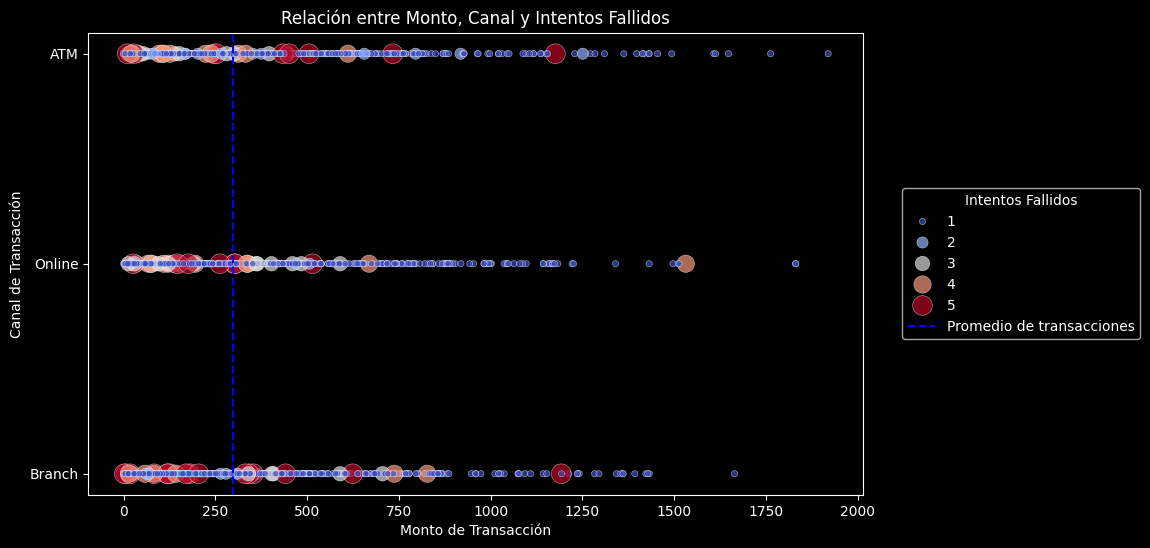

In [ ]:
mean_amount = df1['TransactionAmount'].mean()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='TransactionAmount', y='Channel', hue='LoginAttempts', size='LoginAttempts', palette='coolwarm', sizes=(20, 200), alpha=0.7)
plt.axvline(x=mean_amount, color='blue', linestyle='--', label='Promedio de transacciones')
plt.xlabel('Monto de Transacción')
plt.ylabel('Canal de Transacción')
plt.title('Relación entre Monto, Canal y Intentos Fallidos')

# Leyenda a la derecha
plt.legend(title='Intentos Fallidos', loc='center left', bbox_to_anchor=(1.05, 0.5), borderaxespad=0.)

plt.show()

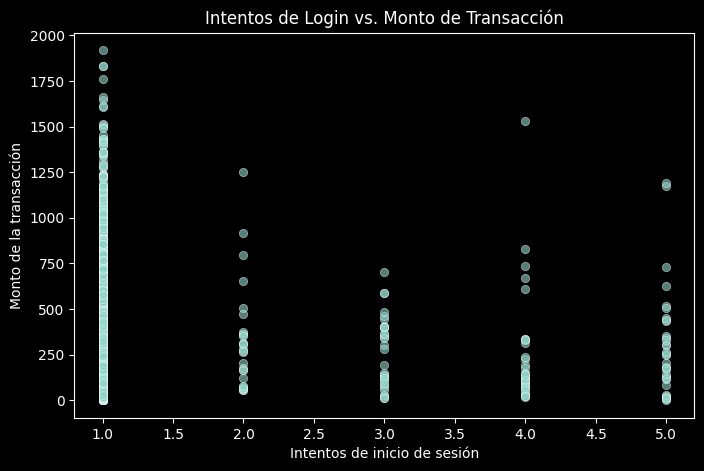

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df1, x="LoginAttempts", y="TransactionAmount", alpha=0.6)
plt.xlabel("Intentos de inicio de sesión")
plt.ylabel("Monto de la transacción")
plt.title("Intentos de Login vs. Monto de Transacción")
plt.show()


🔍 Posibles fraudes: Si hay muchas fallas de login antes de transacciones grandes, puede ser un intento de acceso no autorizado.

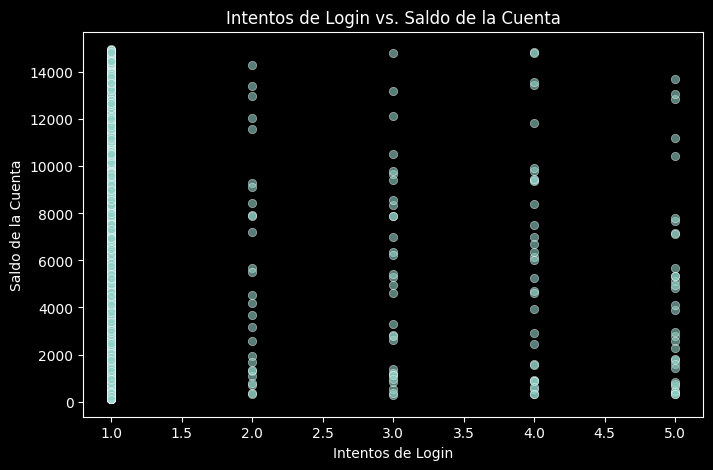

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df1, x="LoginAttempts", y="AccountBalance", alpha=0.6)
plt.xlabel("Intentos de Login")
plt.ylabel("Saldo de la Cuenta")
plt.title("Intentos de Login vs. Saldo de la Cuenta")
plt.show()

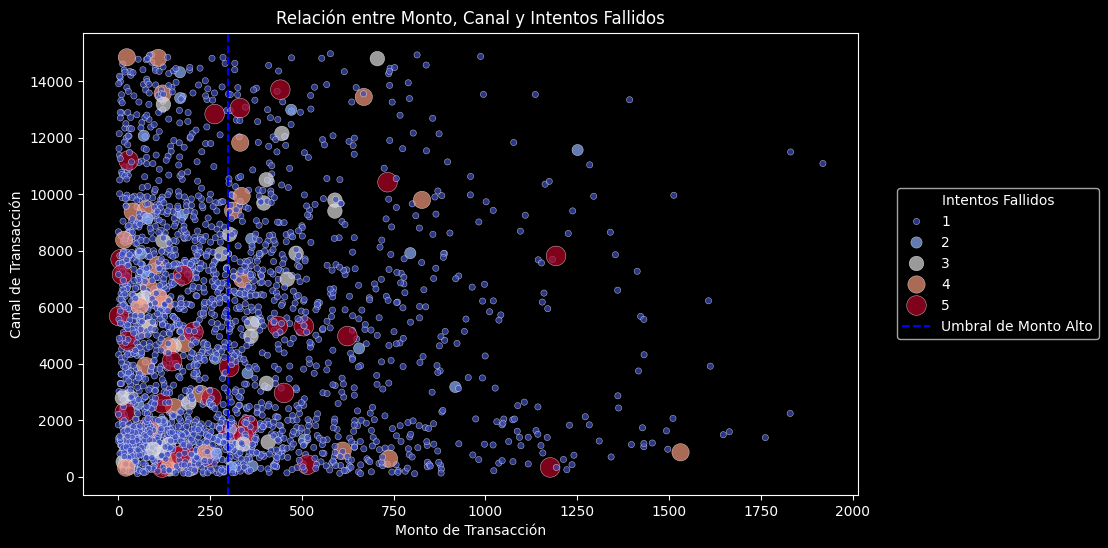

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='TransactionAmount', y='AccountBalance', hue='LoginAttempts', size='LoginAttempts', palette='coolwarm', sizes=(20, 200), alpha=0.7)
plt.axvline(x=mean_amount, color='blue', linestyle='--', label='Umbral de Monto Alto')
plt.xlabel('Monto de Transacción')
plt.ylabel('Canal de Transacción')
plt.title('Relación entre Monto, Canal y Intentos Fallidos')

# Leyenda a la derecha
plt.legend(title='Intentos Fallidos', loc='center left', bbox_to_anchor=(1.05, 0.5), borderaxespad=0.)

plt.show()

🔍 Posibles fraudes: Si hay muchos inicios de sesion y el saldo de la cuenta queda en 0

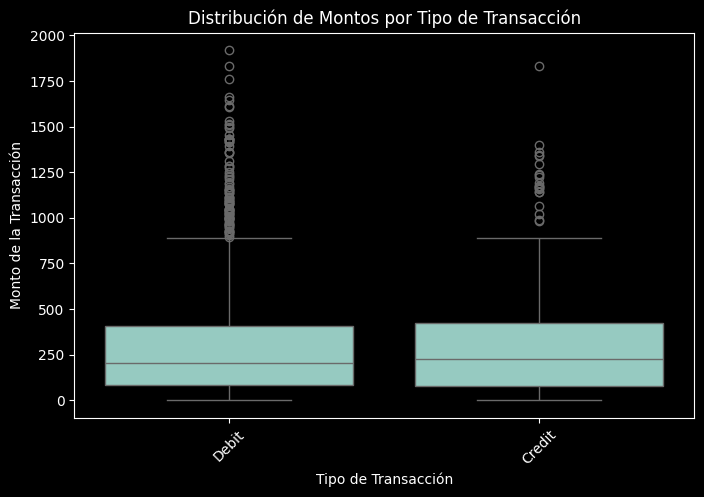

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df1, x="TransactionType", y="TransactionAmount")
plt.xticks(rotation=45)
plt.xlabel("Tipo de Transacción")
plt.ylabel("Monto de la Transacción")
plt.title("Distribución de Montos por Tipo de Transacción")
plt.show()

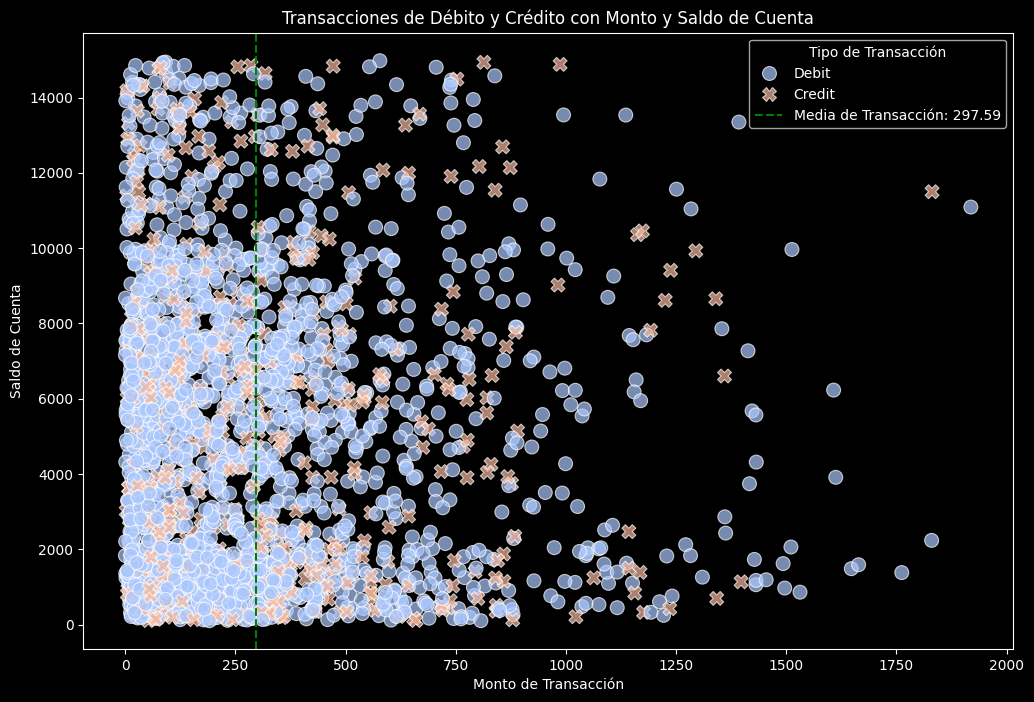

In [ ]:
mean_amount = df1['TransactionAmount'].mean()

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df1,
                x='TransactionAmount',
                y='AccountBalance',
                hue='TransactionType',  # Diferencia entre Crédito y Débito
                style='TransactionType',  # Estilo para diferenciar
                palette='coolwarm',
                s=100,
                alpha=0.7)

# Añadir línea de la media de las transacciones
plt.axvline(x=mean_amount, color='green', linestyle='--', label=f'Media de Transacción: {mean_amount:.2f}')

# Etiquetas y título
plt.xlabel('Monto de Transacción')
plt.ylabel('Saldo de Cuenta')
plt.title('Transacciones de Débito y Crédito con Monto y Saldo de Cuenta')

# Mostrar la leyenda
plt.legend(title='Tipo de Transacción')

# Mostrar el gráfico
plt.show()

🔍 Posibles fraudes: Transacciones de crédito/débito con montos extremadamente altos en comparación con la media.

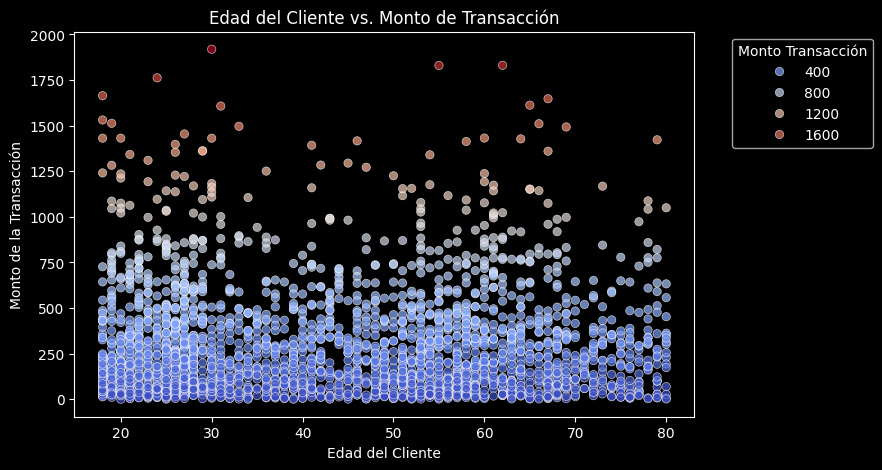

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="CustomerAge", y="TransactionAmount", hue="TransactionAmount", palette="coolwarm", alpha=0.7)
plt.xlabel("Edad del Cliente")
plt.ylabel("Monto de la Transacción")
plt.title("Edad del Cliente vs. Monto de Transacción")
plt.legend(title="Monto Transacción", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

 🔍Posibles fraudes: Transacciones de alto monto realizadas por personas muy jóvenes o ancianos pueden ser sospechosas.

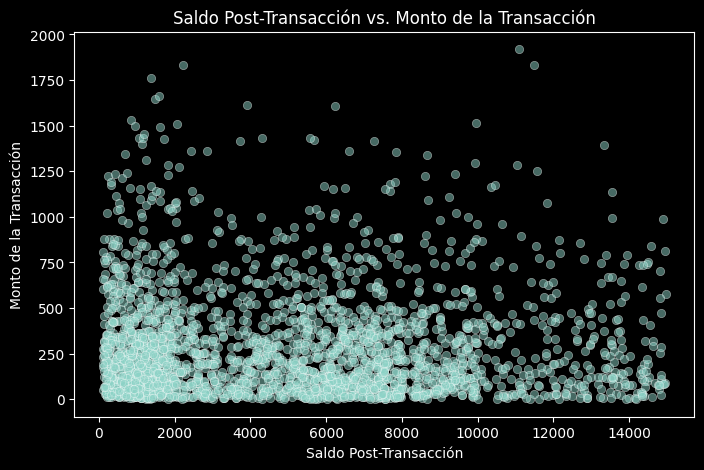

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df1, x="AccountBalance", y="TransactionAmount", alpha=0.5)
plt.xlabel("Saldo Post-Transacción")
plt.ylabel("Monto de la Transacción")
plt.title("Saldo Post-Transacción vs. Monto de la Transacción")
plt.show()

Posibles fraudes: Personas que gastan casi todo su saldo en una sola transacción.

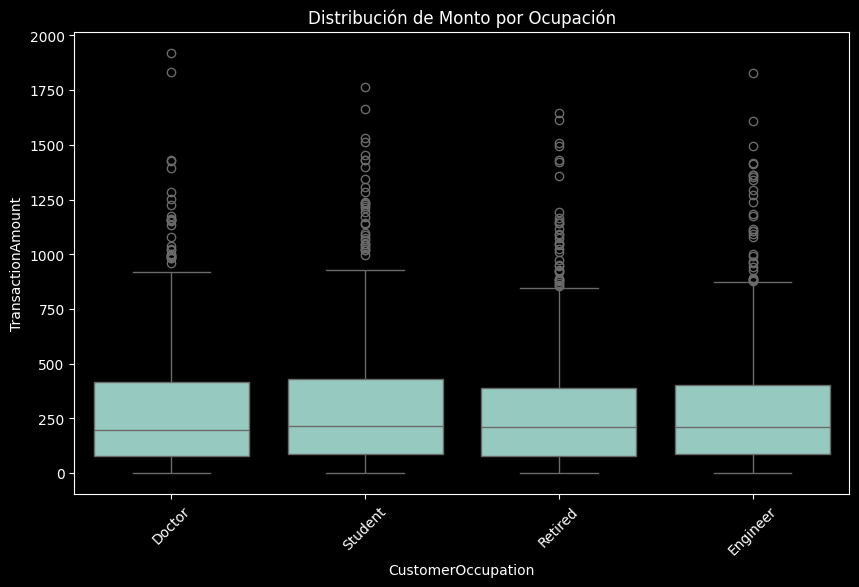

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="CustomerOccupation", y="TransactionAmount")

plt.xticks(rotation=45)
plt.title("Distribución de Monto por Ocupación")
plt.show()


🔍 Posibles fraudes: Si estudiantes o jubilados hacen compras con montos muy altos, puede ser sospechoso.

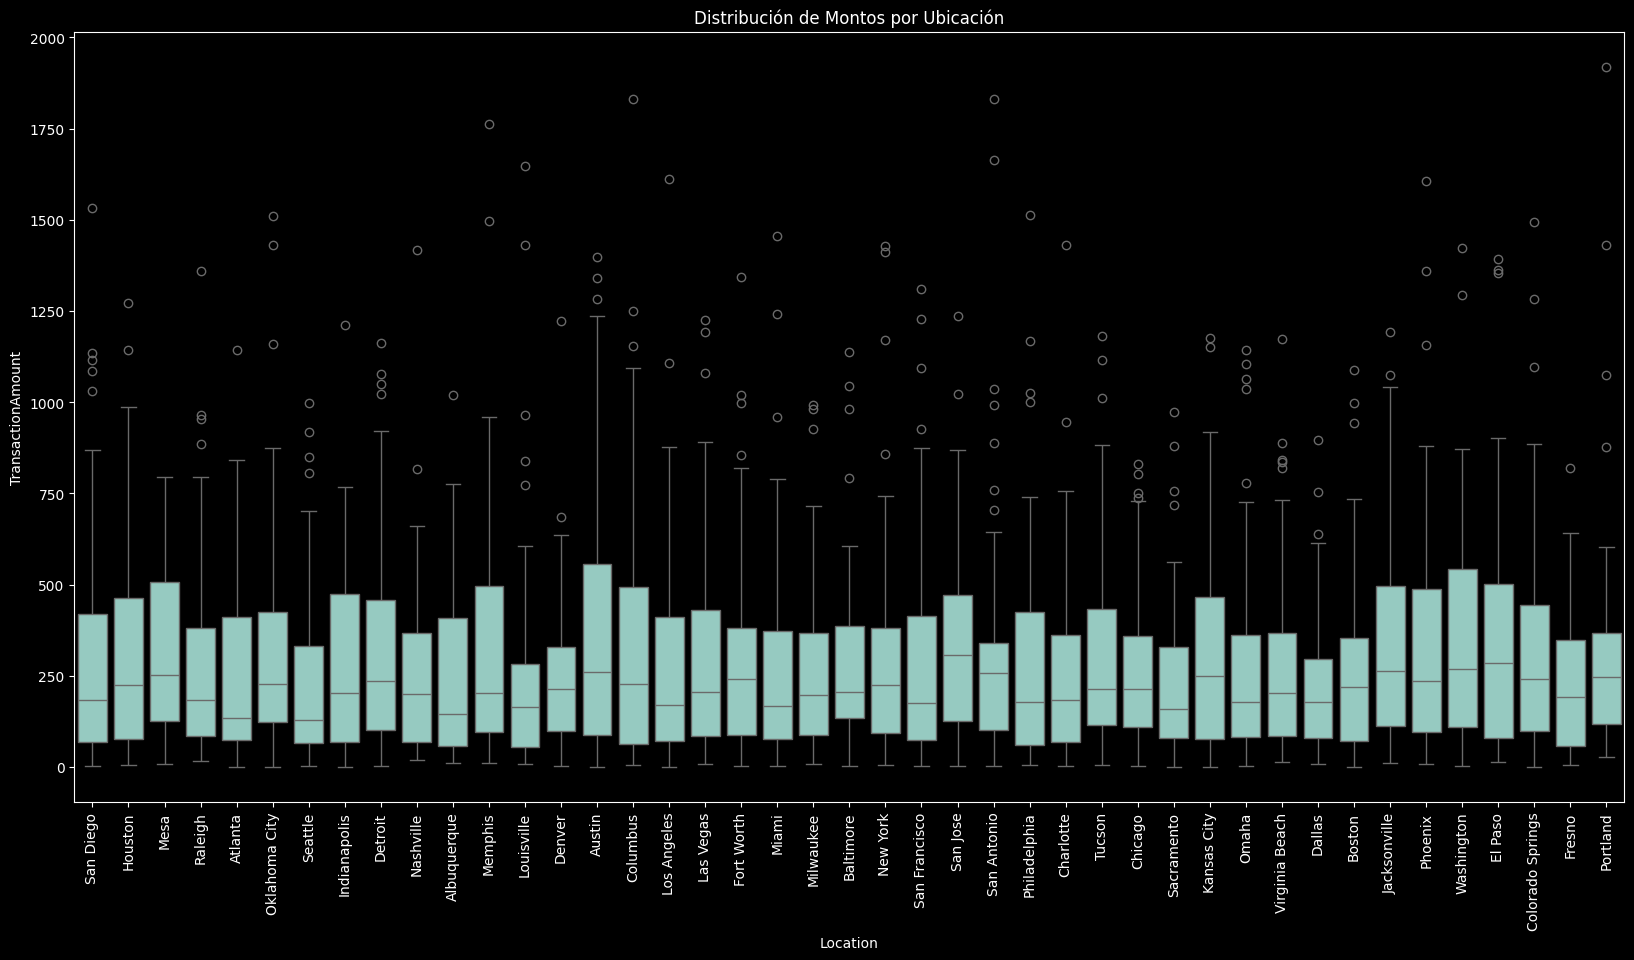

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df1, x="Location", y="TransactionAmount")
plt.xticks(rotation=90)
plt.title("Distribución de Montos por Ubicación")
plt.show()

🔍Posible Fraude: transacciones de grandes montos realizadas en lugares donde normalmente no se realizan, lo cual podría ser un indicio de fraude.

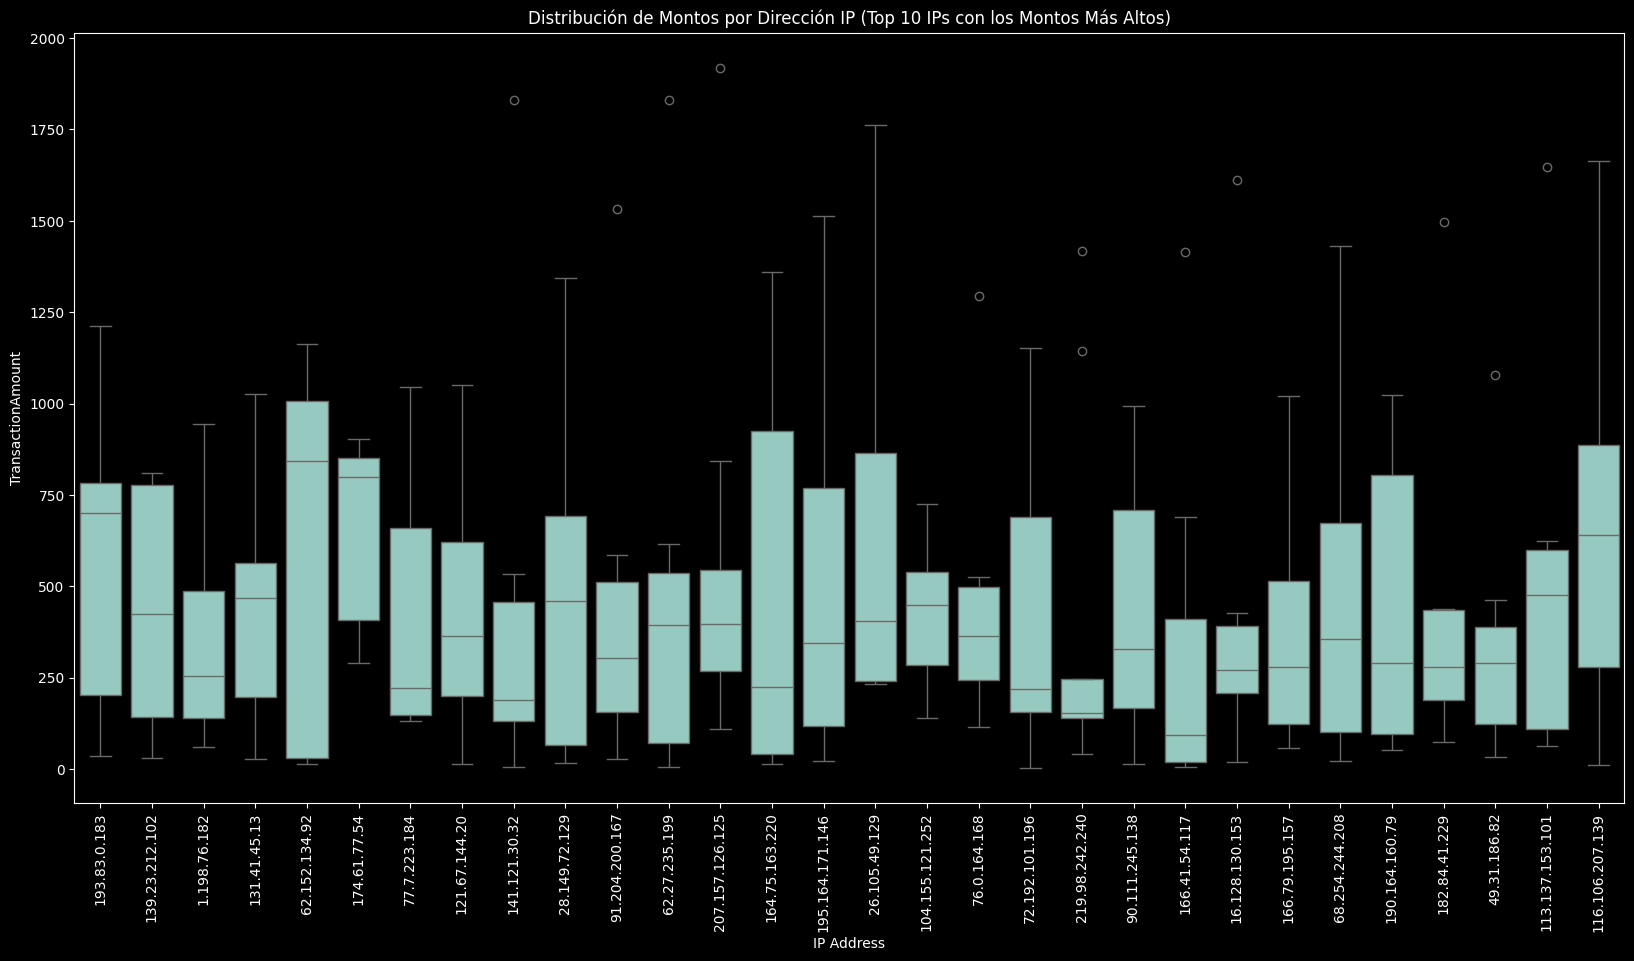

In [ ]:
# Agrupar por IP Address y calcular el monto total de las transacciones
ip_total = df1.groupby('IP Address')['TransactionAmount'].sum().reset_index()

# Ordenar las IPs por monto total de transacciones en orden descendente
ip_total_sorted = ip_total.sort_values(by='TransactionAmount', ascending=False)

# Seleccionar las IPs con los montos más altos (por ejemplo, las 10 más altas)
top_ips = ip_total_sorted.head(30)

# Filtrar el dataframe original para mostrar solo las transacciones de estas IPs
df_top_ips = df1[df1['IP Address'].isin(top_ips['IP Address'])]

# Visualizar el boxplot con las IPs que tienen los montos más altos de transacciones
plt.figure(figsize=(20,10))
sns.boxplot(data=df_top_ips, x="IP Address", y="TransactionAmount")
plt.xticks(rotation=90)
plt.title("Distribución de Montos por Dirección IP (Top 10 IPs con los Montos Más Altos)")
plt.show()


🔍Posible Fraude: Si una IP tiene un monto total de transacciones significativamente mayor que el resto, podría indicar un comportamiento sospechoso, como intentos de fraude con múltiples compras de alto valor.

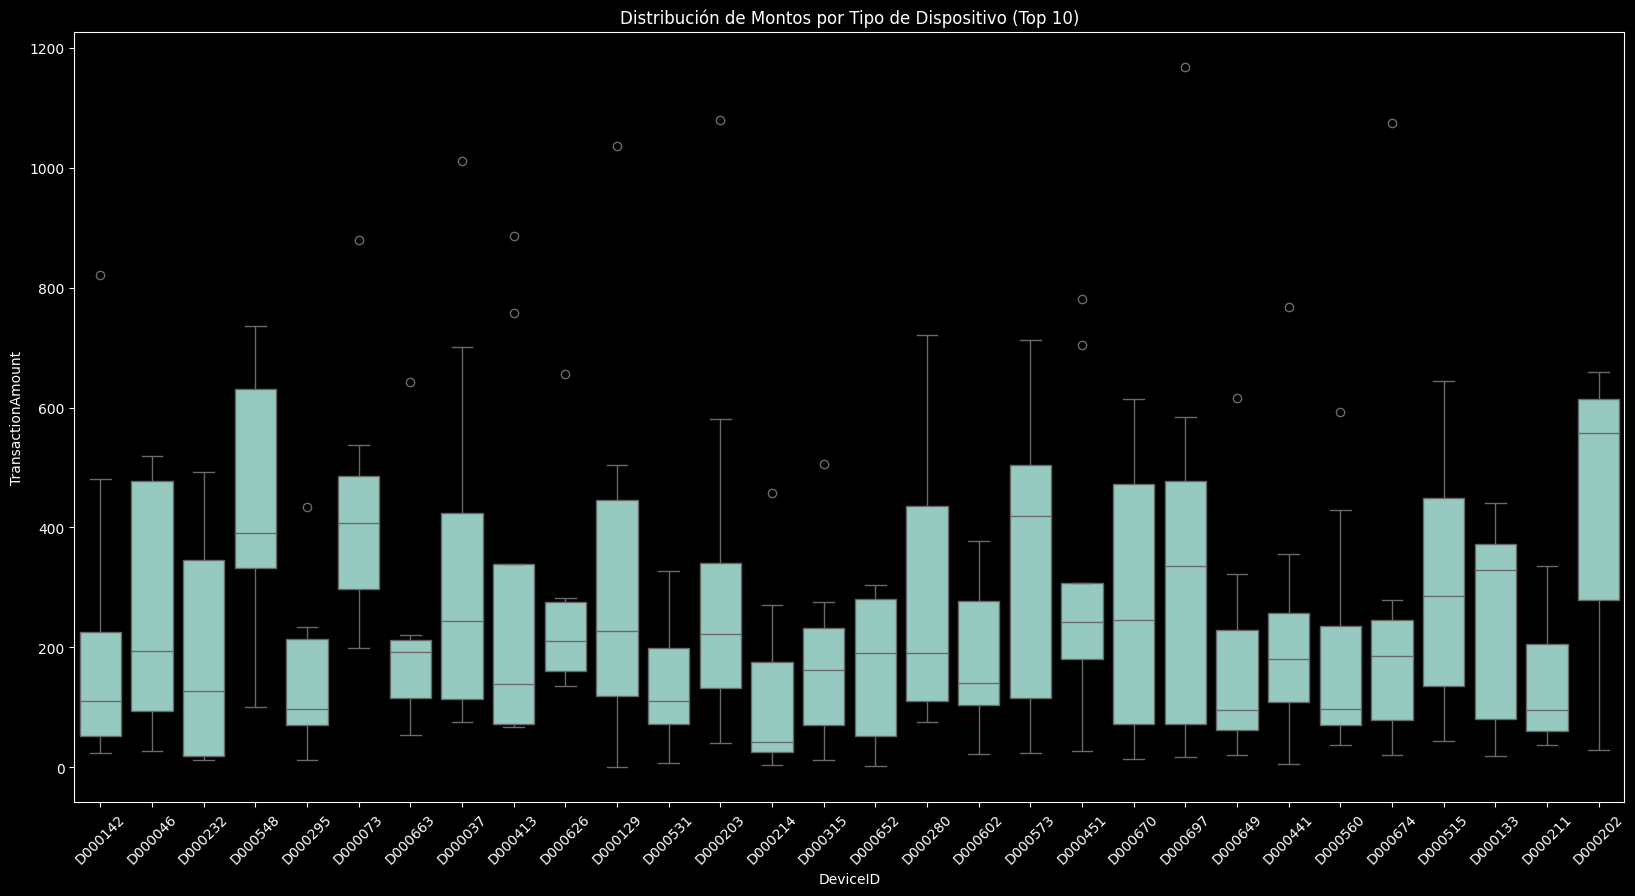

In [ ]:
# Contar las frecuencias de cada dispositivo
top_devices = df1['DeviceID'].value_counts().nlargest(30).index

# Filtrar solo los dispositivos más frecuentes
df_filtered = df1[df1['DeviceID'].isin(top_devices)]

plt.figure(figsize=(20,10))
sns.boxplot(data=df_filtered, x="DeviceID", y="TransactionAmount")
plt.xticks(rotation=45)
plt.title("Distribución de Montos por Tipo de Dispositivo (Top 10)")
plt.show()


🔍Posible Fraude: Si un DeviceID aparece con outliers, de montos altos de transacciones, podría ser un bot o un fraude organizado utilizando el mismo dispositivo para múltiples compras.

#Analisis Multivariado

##Correlacion

In [ ]:
columnas_numericas = df1.select_dtypes(include=np.number)

# Calculate correlation on numeric data
correlation = columnas_numericas.corr(method="pearson")

correlation

TransactionAmount  CustomerAge  TransactionDuration  \
TransactionAmount             1.000000    -0.025616             0.004359   
CustomerAge                  -0.025616     1.000000            -0.017936   
TransactionDuration           0.004359    -0.017936             1.000000   
LoginAttempts                -0.008445     0.007653             0.032639   
AccountBalance               -0.025165     0.319942             0.005577   

                     LoginAttempts  AccountBalance  
TransactionAmount        -0.008445       -0.025165  
CustomerAge               0.007653        0.319942  
TransactionDuration       0.032639        0.005577  
LoginAttempts             1.000000        0.014999  
AccountBalance            0.014999        1.000000

In [ ]:
columnas_numericas = df1.select_dtypes(include=['int64', 'float64']).columns.tolist()

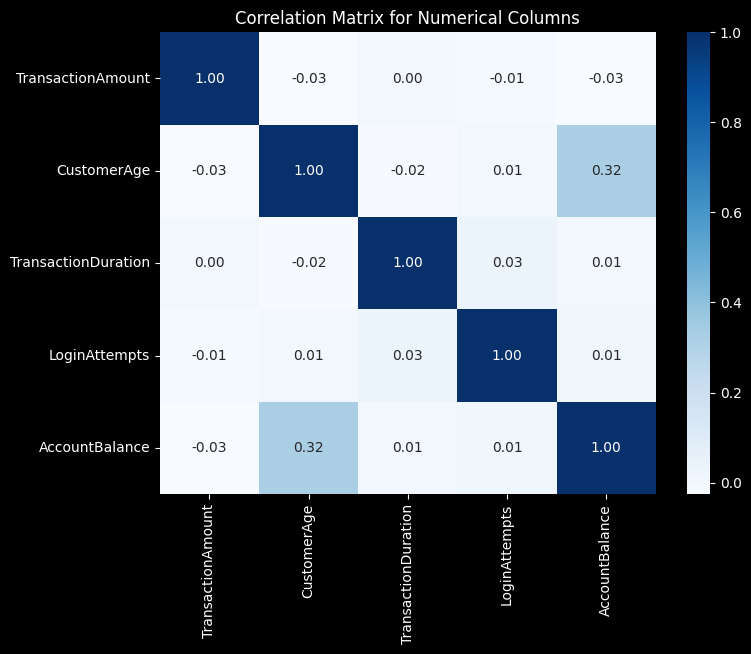

In [ ]:
cmap = "Blues"
correlation_matrix = df[columnas_numericas].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f")
plt.title('Correlation Matrix for Numerical Columns')
plt.show()

 la única relación  significativa es entre CustomerAge y AccountBalance, que muestra que la edad del cliente podría influir en el saldo de la cuenta. Las demás relaciones son muy débiles

## Relación entre Canal de Pago, Monto de Transacción y Intentos de Login

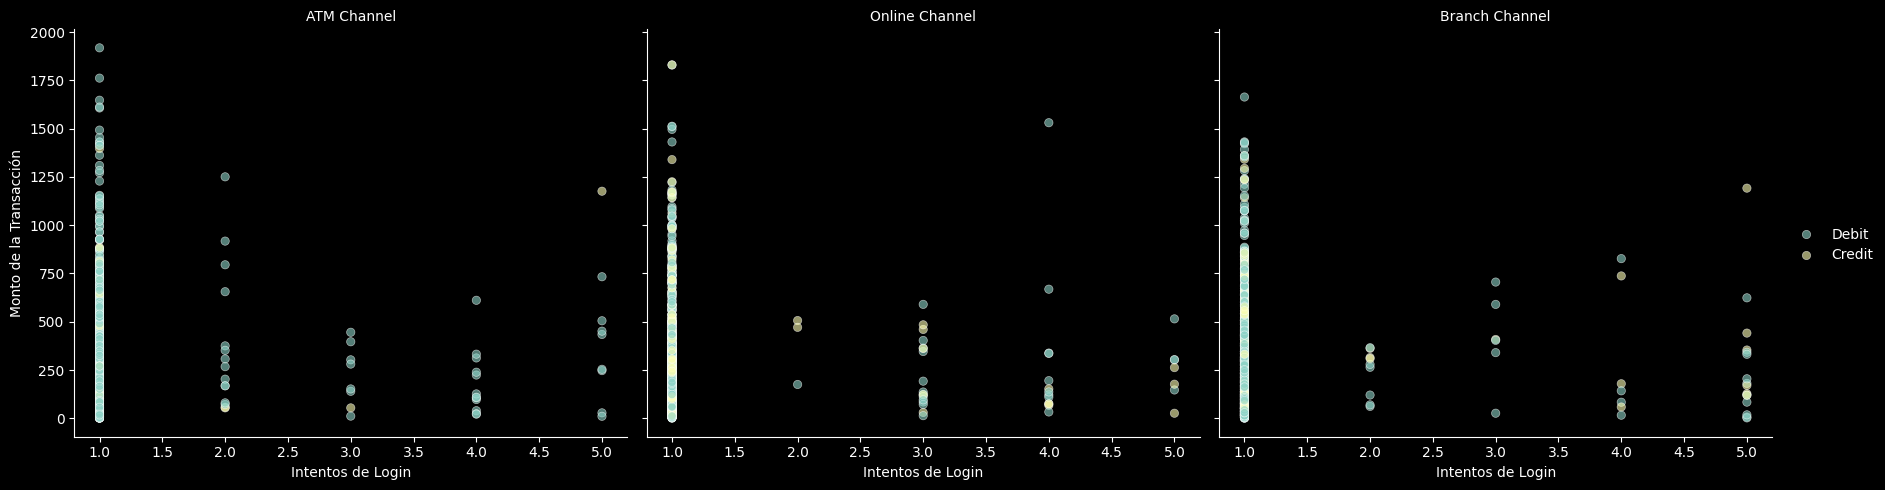

In [ ]:
g = sns.FacetGrid(df1, col="Channel", height=5, aspect=1.2)
# Pass data explicitly to scatterplot
g.map(sns.scatterplot, "LoginAttempts", "TransactionAmount", alpha=0.6, hue='TransactionType', data=df1)

# Ajustar etiquetas y títulos
g.set_axis_labels("Intentos de Login", "Monto de la Transacción")
g.set_titles("{col_name} Channel")
g.add_legend()

# Mostrar el gráfico
plt.show()

🔍 Posibles Fraudes: Si los canales online muestran altos montos con intentos de login fallidos, esto puede ser un indicio de acceso no autorizado antes de realizar grandes transacciones.

 ## Relación entre Intentos de Login, Saldo de Cuenta y Monto de Transacción

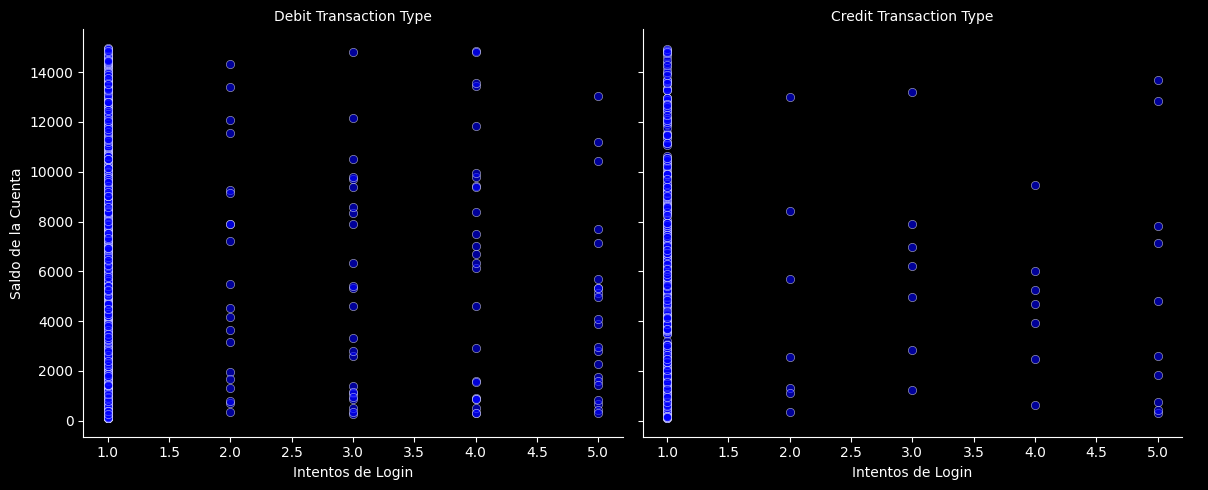

In [ ]:
g = sns.FacetGrid(df1, col="TransactionType", height=5, aspect=1.2)
g.map(sns.scatterplot, "LoginAttempts", "AccountBalance", alpha=0.6, color='blue')
g.set_axis_labels("Intentos de Login", "Saldo de la Cuenta")
g.set_titles("{col_name} Transaction Type")
g.add_legend()
plt.show()


🔍 Posibles Fraudes: Si hay muchos intentos de login seguidos de transacciones de alto monto y un saldo casi vacío, esto podría indicar que un atacante está intentando acceder y gastar el dinero de la cuenta.

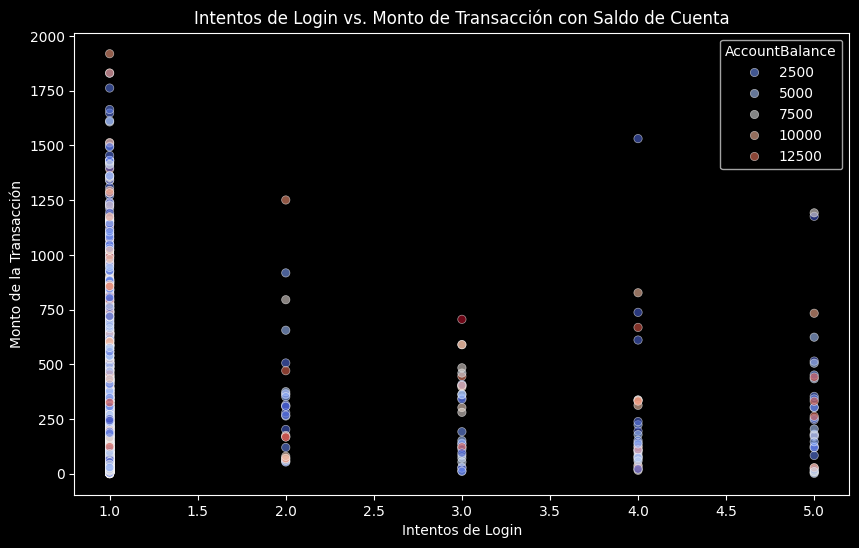

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df1, x="LoginAttempts", y="TransactionAmount", hue="AccountBalance", palette="coolwarm", alpha=0.6)
plt.xlabel("Intentos de Login")
plt.ylabel("Monto de la Transacción")
plt.title("Intentos de Login vs. Monto de Transacción con Saldo de Cuenta")
plt.show()

Posible Fraude: Las transacciones de alto monto con un saldo bajo y muchos intentos de inicio de sesión pueden ser indicios de un comportamiento sospechoso.

## Distribución de Montos de Transacción por Edad del Cliente y Saldo de Cuenta

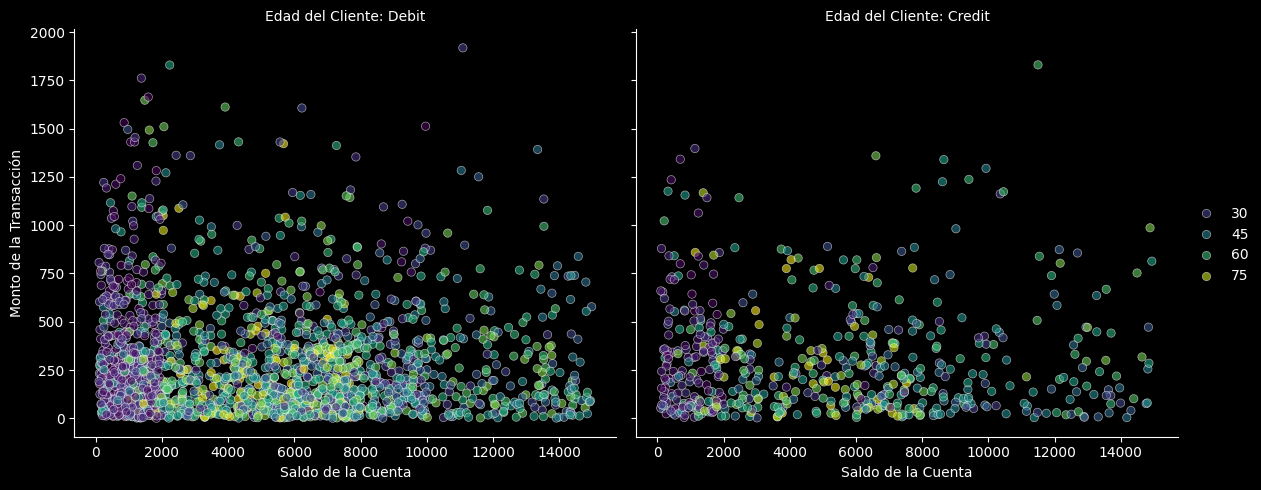

In [ ]:
g = sns.FacetGrid(df1, col="TransactionType", height=5, aspect=1.2)
g.map(sns.scatterplot, "AccountBalance", "TransactionAmount", alpha=0.6,hue='CustomerAge', data=df1, palette='viridis')
g.set_axis_labels("Saldo de la Cuenta", "Monto de la Transacción")
g.set_titles("Edad del Cliente: {col_name}")
g.add_legend()
plt.show()

🔍 Posibles Fraudes: Transacciones grandes realizadas por personas muy jóvenes o muy mayores podrían ser sospechosas, especialmente si el saldo de la cuenta está muy bajo.

## Analisis multivariado teniendo en cuenta el tipo de transaccion: debito o credito

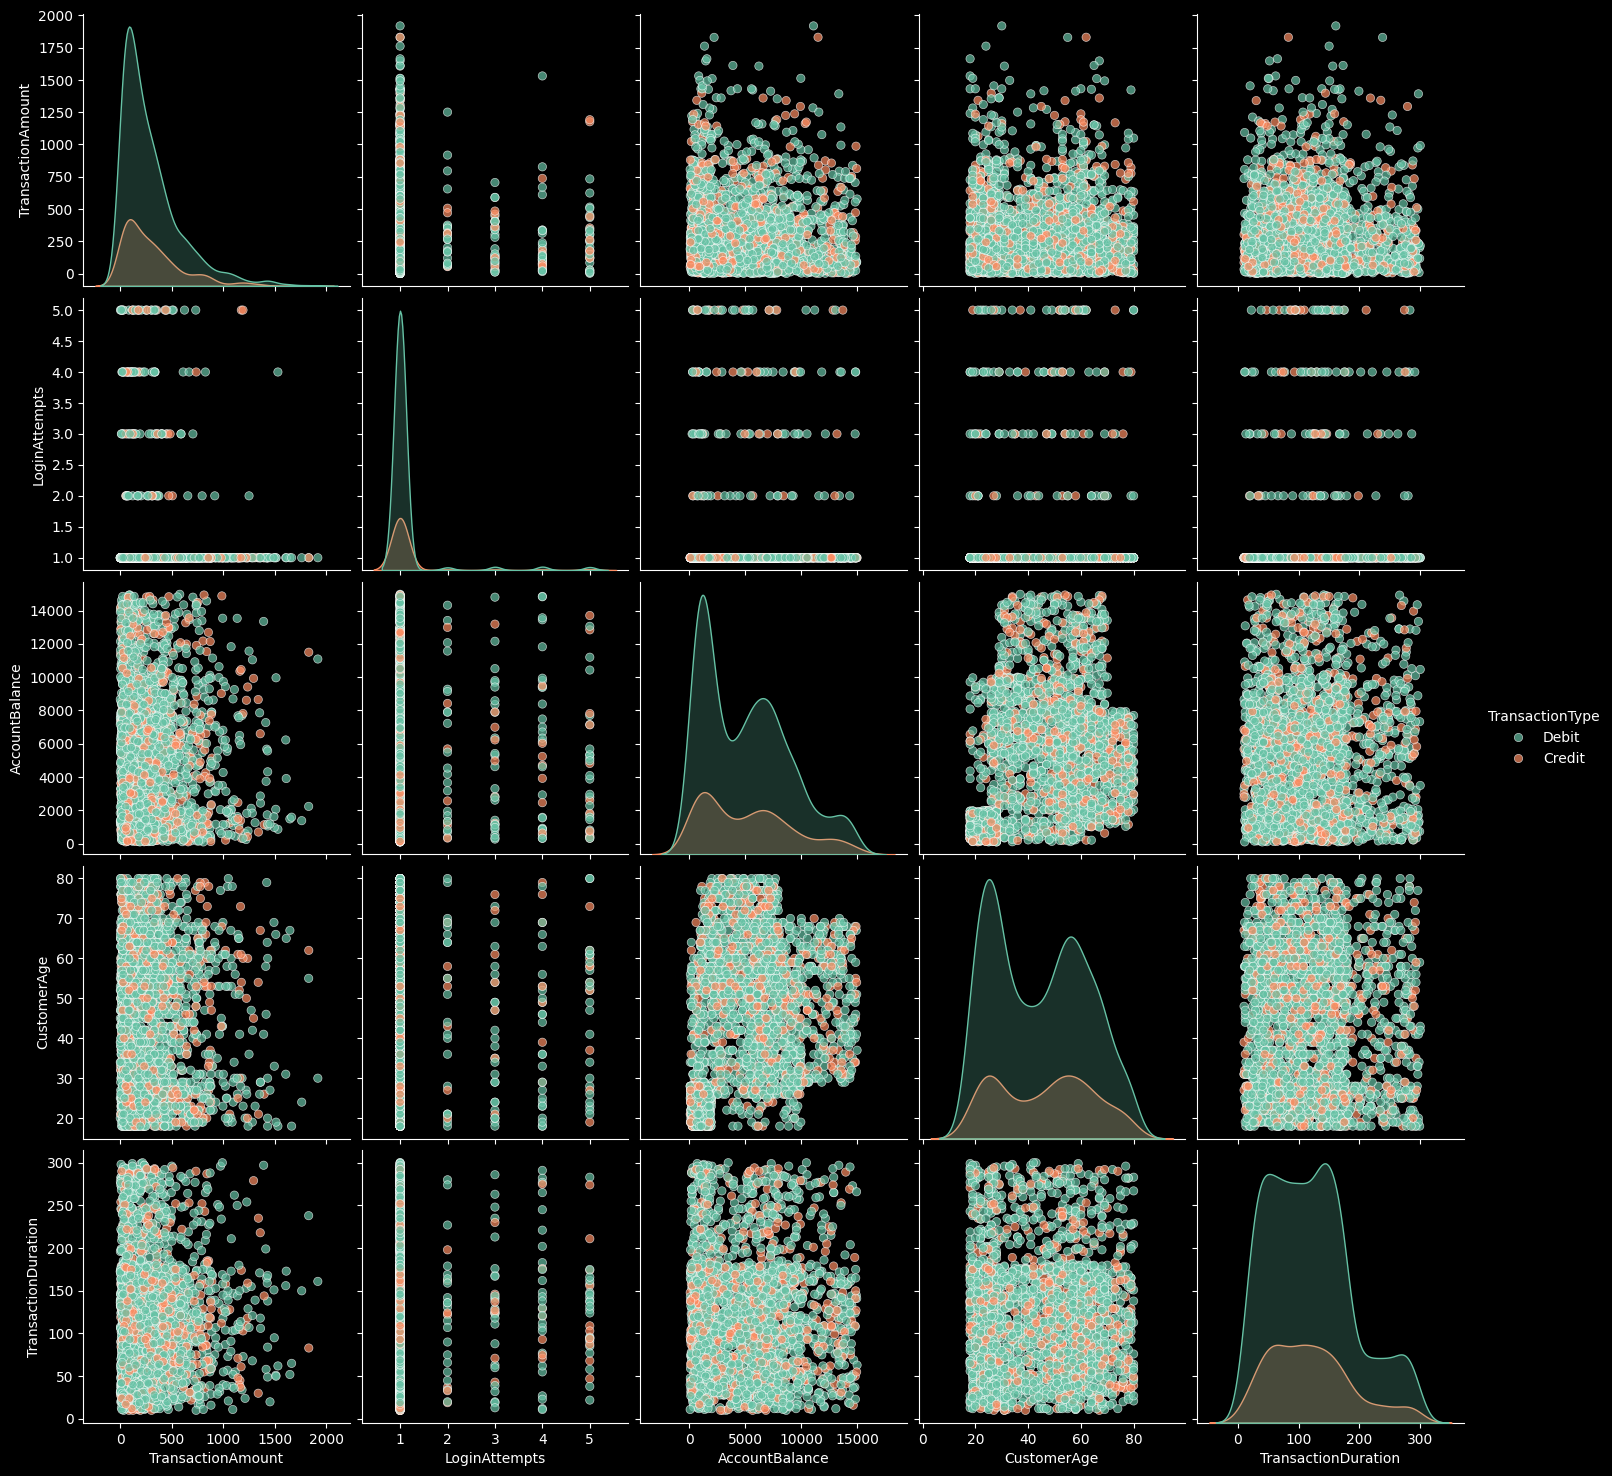

In [ ]:
sns.pairplot(df1[['TransactionAmount', 'LoginAttempts', 'AccountBalance', 'CustomerAge', 'TransactionDuration', 'TransactionType']],
             hue='TransactionType',
             height=3,
             palette='Set2',
             diag_kind='kde',
             plot_kws={'alpha': 0.7})
plt.show()